In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import folium 
from folium import plugins
plt.rcParams['figure.figsize'] = 100, 50

pyo.init_notebook_mode(connected=True)
cf.go_offline()
import warnings
warnings.filterwarnings('ignore')

In [69]:
 confirmedGlobal=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv',encoding='utf-8',na_values=None)
deathGLobal=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoverGlobal=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
confirmedGlobal['NewContryCode']=confirmedGlobal['Country/Region']+confirmedGlobal['Province/State'].fillna('')
#deathGLobal['NewContryCode']=deathGLobal['Country/Region']+deathGLobal['Province/State'].fillna('')
#recoverGlobal['NewContryCode']=recoverGlobal['Country/Region']+recoverGlobal['Province/State'].fillna('')

In [70]:
confirmedGlobal

Province/State      Country/Region        Lat        Long  1/22/20  \
0              NaN         Afghanistan  33.939110   67.709953        0   
1              NaN             Albania  41.153300   20.168300        0   
2              NaN             Algeria  28.033900    1.659600        0   
3              NaN             Andorra  42.506300    1.521800        0   
4              NaN              Angola -11.202700   17.873900        0   
..             ...                 ...        ...         ...      ...   
270            NaN             Vietnam  14.058324  108.277199        0   
271            NaN  West Bank and Gaza  31.952200   35.233200        0   
272            NaN               Yemen  15.552727   48.516388        0   
273            NaN              Zambia -13.133897   27.849332        0   
274            NaN            Zimbabwe -19.015438   29.154857        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  4/26/21  4/27/21  \
0          0        0        0        0        0  ...    59015    59225   
1          0        0        0        0        0  ...   130606   130736   
2          0        0        0        0        0  ...   121112   121344   
3          0        0        0        0        0  ...    13083    13121   
4          0        0        0        0        0  ...    25710    25942   
..       ...      ...      ...      ...      ...  ...      ...      ...   
270        2        2        2        2        2  ...     2852     2857   
271        0        0        0        0        0  ...   292052   293466   
272        0        0        0        0        0  ...     6183     6220   
273        0        0        0        0        0  ...    91378    91418   
274        0        0        0        0        0  ...    38102    38164   

     4/28/21  4/29/21  4/30/21  5/1/21  5/2/21  5/3/21  5/4/21  \
0      59370    59576    59745   59939   60122   60300   60563   
1     130859   130977   131085  131185  131238  131276  131327   
2     121580   121866   122108  122311  122522  122717  122999   
3      13148    13198    13232   13232   13282   13295   13316   
4      26168    26431    26652   26815   26993   27133   27284   
..       ...      ...      ...     ...     ...     ...     ...   
270     2865     2910     2928    2942    2962    2985    2995   
271   294550   295601   296462  296462  297638  298203  298921   
272     6263     6294     6317    6325    6341    6363    6390   
273    91484    91533    91586   91670   91693   91722   91804   
274    38191    38235    38257   38260   38281   38293   38327   

          NewContryCode  
0           Afghanistan  
1               Albania  
2               Algeria  
3               Andorra  
4                Angola  
..                  ...  
270             Vietnam  
271  West Bank and Gaza  
272               Yemen  
273              Zambia  
274            Zimbabwe  

[275 rows x 474 columns]

In [71]:
confirmedGlobal.drop(['Province/State'],axis=1,inplace=True)

In [72]:
confirmedGlobal

Country/Region        Lat        Long  1/22/20  1/23/20  1/24/20  \
0           Afghanistan  33.939110   67.709953        0        0        0   
1               Albania  41.153300   20.168300        0        0        0   
2               Algeria  28.033900    1.659600        0        0        0   
3               Andorra  42.506300    1.521800        0        0        0   
4                Angola -11.202700   17.873900        0        0        0   
..                  ...        ...         ...      ...      ...      ...   
270             Vietnam  14.058324  108.277199        0        2        2   
271  West Bank and Gaza  31.952200   35.233200        0        0        0   
272               Yemen  15.552727   48.516388        0        0        0   
273              Zambia -13.133897   27.849332        0        0        0   
274            Zimbabwe -19.015438   29.154857        0        0        0   

     1/25/20  1/26/20  1/27/20  1/28/20  ...  4/26/21  4/27/21  4/28/21  \
0          0        0        0        0  ...    59015    59225    59370   
1          0        0        0        0  ...   130606   130736   130859   
2          0        0        0        0  ...   121112   121344   121580   
3          0        0        0        0  ...    13083    13121    13148   
4          0        0        0        0  ...    25710    25942    26168   
..       ...      ...      ...      ...  ...      ...      ...      ...   
270        2        2        2        2  ...     2852     2857     2865   
271        0        0        0        0  ...   292052   293466   294550   
272        0        0        0        0  ...     6183     6220     6263   
273        0        0        0        0  ...    91378    91418    91484   
274        0        0        0        0  ...    38102    38164    38191   

     4/29/21  4/30/21  5/1/21  5/2/21  5/3/21  5/4/21       NewContryCode  
0      59576    59745   59939   60122   60300   60563         Afghanistan  
1     130977   131085  131185  131238  131276  131327             Albania  
2     121866   122108  122311  122522  122717  122999             Algeria  
3      13198    13232   13232   13282   13295   13316             Andorra  
4      26431    26652   26815   26993   27133   27284              Angola  
..       ...      ...     ...     ...     ...     ...                 ...  
270     2910     2928    2942    2962    2985    2995             Vietnam  
271   295601   296462  296462  297638  298203  298921  West Bank and Gaza  
272     6294     6317    6325    6341    6363    6390               Yemen  
273    91533    91586   91670   91693   91722   91804              Zambia  
274    38235    38257   38260   38281   38293   38327            Zimbabwe  

[275 rows x 473 columns]

In [73]:
confirmedGlobal['Total Cases'] = confirmedGlobal[confirmedGlobal.columns[-2]]

In [74]:
confirmedGlobal

Country/Region        Lat        Long  1/22/20  1/23/20  1/24/20  \
0           Afghanistan  33.939110   67.709953        0        0        0   
1               Albania  41.153300   20.168300        0        0        0   
2               Algeria  28.033900    1.659600        0        0        0   
3               Andorra  42.506300    1.521800        0        0        0   
4                Angola -11.202700   17.873900        0        0        0   
..                  ...        ...         ...      ...      ...      ...   
270             Vietnam  14.058324  108.277199        0        2        2   
271  West Bank and Gaza  31.952200   35.233200        0        0        0   
272               Yemen  15.552727   48.516388        0        0        0   
273              Zambia -13.133897   27.849332        0        0        0   
274            Zimbabwe -19.015438   29.154857        0        0        0   

     1/25/20  1/26/20  1/27/20  1/28/20  ...  4/27/21  4/28/21  4/29/21  \
0          0        0        0        0  ...    59225    59370    59576   
1          0        0        0        0  ...   130736   130859   130977   
2          0        0        0        0  ...   121344   121580   121866   
3          0        0        0        0  ...    13121    13148    13198   
4          0        0        0        0  ...    25942    26168    26431   
..       ...      ...      ...      ...  ...      ...      ...      ...   
270        2        2        2        2  ...     2857     2865     2910   
271        0        0        0        0  ...   293466   294550   295601   
272        0        0        0        0  ...     6220     6263     6294   
273        0        0        0        0  ...    91418    91484    91533   
274        0        0        0        0  ...    38164    38191    38235   

     4/30/21  5/1/21  5/2/21  5/3/21  5/4/21       NewContryCode  Total Cases  
0      59745   59939   60122   60300   60563         Afghanistan        60563  
1     131085  131185  131238  131276  131327             Albania       131327  
2     122108  122311  122522  122717  122999             Algeria       122999  
3      13232   13232   13282   13295   13316             Andorra        13316  
4      26652   26815   26993   27133   27284              Angola        27284  
..       ...     ...     ...     ...     ...                 ...          ...  
270     2928    2942    2962    2985    2995             Vietnam         2995  
271   296462  296462  297638  298203  298921  West Bank and Gaza       298921  
272     6317    6325    6341    6363    6390               Yemen         6390  
273    91586   91670   91693   91722   91804              Zambia        91804  
274    38257   38260   38281   38293   38327            Zimbabwe        38327  

[275 rows x 474 columns]

In [75]:
confirmedGlobal['Total Cases'].sum()

154359533

In [76]:
total_global_cases = confirmedGlobal['Total Cases'].sum()

In [77]:
total_global_cases

154359533

In [78]:
print('The total infections in the world is: ', total_global_cases)

The total infections in the world is:  154359533


In [79]:
deathGLobal

Province/State      Country/Region        Lat        Long  1/22/20  \
0              NaN         Afghanistan  33.939110   67.709953        0   
1              NaN             Albania  41.153300   20.168300        0   
2              NaN             Algeria  28.033900    1.659600        0   
3              NaN             Andorra  42.506300    1.521800        0   
4              NaN              Angola -11.202700   17.873900        0   
..             ...                 ...        ...         ...      ...   
270            NaN             Vietnam  14.058324  108.277199        0   
271            NaN  West Bank and Gaza  31.952200   35.233200        0   
272            NaN               Yemen  15.552727   48.516388        0   
273            NaN              Zambia -13.133897   27.849332        0   
274            NaN            Zimbabwe -19.015438   29.154857        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  4/25/21  4/26/21  \
0          0        0        0        0        0  ...     2582     2592   
1          0        0        0        0        0  ...     2378     2379   
2          0        0        0        0        0  ...     3207     3217   
3          0        0        0        0        0  ...      124      124   
4          0        0        0        0        0  ...      579      583   
..       ...      ...      ...      ...      ...  ...      ...      ...   
270        0        0        0        0        0  ...       35       35   
271        0        0        0        0        0  ...     3167     3184   
272        0        0        0        0        0  ...     1187     1205   
273        0        0        0        0        0  ...     1246     1248   
274        0        0        0        0        0  ...     1557     1560   

     4/27/21  4/28/21  4/29/21  4/30/21  5/1/21  5/2/21  5/3/21  5/4/21  
0       2598     2611     2618     2625    2631    2637    2642    2648  
1       2383     2386     2389     2394    2396    2397    2399    2402  
2       3225     3234     3244     3253    3261    3270    3280    3289  
3        124      125      125      125     125     127     127     127  
4        587      591      594      596     600     602     603     609  
..       ...      ...      ...      ...     ...     ...     ...     ...  
270       35       35       35       35      35      35      35      35  
271     3201     3206     3231     3249    3249    3272    3283    3296  
272     1207     1216     1222     1226    1229    1233    1239    1240  
273     1249     1249     1250     1251    1251    1253    1253    1254  
274     1565     1565     1567     1567    1568    1570    1573    1574  

[275 rows x 473 columns]

In [80]:
deathGLobal['Total Deaths'] = deathGLobal[deathGLobal.columns[-1]]

In [81]:
deathGLobal

Province/State      Country/Region        Lat        Long  1/22/20  \
0              NaN         Afghanistan  33.939110   67.709953        0   
1              NaN             Albania  41.153300   20.168300        0   
2              NaN             Algeria  28.033900    1.659600        0   
3              NaN             Andorra  42.506300    1.521800        0   
4              NaN              Angola -11.202700   17.873900        0   
..             ...                 ...        ...         ...      ...   
270            NaN             Vietnam  14.058324  108.277199        0   
271            NaN  West Bank and Gaza  31.952200   35.233200        0   
272            NaN               Yemen  15.552727   48.516388        0   
273            NaN              Zambia -13.133897   27.849332        0   
274            NaN            Zimbabwe -19.015438   29.154857        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  4/26/21  4/27/21  \
0          0        0        0        0        0  ...     2592     2598   
1          0        0        0        0        0  ...     2379     2383   
2          0        0        0        0        0  ...     3217     3225   
3          0        0        0        0        0  ...      124      124   
4          0        0        0        0        0  ...      583      587   
..       ...      ...      ...      ...      ...  ...      ...      ...   
270        0        0        0        0        0  ...       35       35   
271        0        0        0        0        0  ...     3184     3201   
272        0        0        0        0        0  ...     1205     1207   
273        0        0        0        0        0  ...     1248     1249   
274        0        0        0        0        0  ...     1560     1565   

     4/28/21  4/29/21  4/30/21  5/1/21  5/2/21  5/3/21  5/4/21  Total Deaths  
0       2611     2618     2625    2631    2637    2642    2648          2648  
1       2386     2389     2394    2396    2397    2399    2402          2402  
2       3234     3244     3253    3261    3270    3280    3289          3289  
3        125      125      125     125     127     127     127           127  
4        591      594      596     600     602     603     609           609  
..       ...      ...      ...     ...     ...     ...     ...           ...  
270       35       35       35      35      35      35      35            35  
271     3206     3231     3249    3249    3272    3283    3296          3296  
272     1216     1222     1226    1229    1233    1239    1240          1240  
273     1249     1250     1251    1251    1253    1253    1254          1254  
274     1565     1567     1567    1568    1570    1573    1574          1574  

[275 rows x 474 columns]

In [83]:
recoverGlobal

Province/State      Country/Region        Lat        Long  1/22/20  \
0              NaN         Afghanistan  33.939110   67.709953        0   
1              NaN             Albania  41.153300   20.168300        0   
2              NaN             Algeria  28.033900    1.659600        0   
3              NaN             Andorra  42.506300    1.521800        0   
4              NaN              Angola -11.202700   17.873900        0   
..             ...                 ...        ...         ...      ...   
255            NaN             Vietnam  14.058324  108.277199        0   
256            NaN  West Bank and Gaza  31.952200   35.233200        0   
257            NaN               Yemen  15.552727   48.516388        0   
258            NaN              Zambia -13.133897   27.849332        0   
259            NaN            Zimbabwe -19.015438   29.154857        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  4/25/21  4/26/21  \
0          0        0        0        0        0  ...    52489    52520   
1          0        0        0        0        0  ...   105728   106465   
2          0        0        0        0        0  ...    84299    84440   
3          0        0        0        0        0  ...    12491    12519   
4          0        0        0        0        0  ...    23092    23288   
..       ...      ...      ...      ...      ...  ...      ...      ...   
255        0        0        0        0        0  ...     2516     2516   
256        0        0        0        0        0  ...   262602   264660   
257        0        0        0        0        0  ...     2546     2630   
258        0        0        0        0        0  ...    89574    89678   
259        0        0        0        0        0  ...    35123    35149   

     4/27/21  4/28/21  4/29/21  4/30/21  5/1/21  5/2/21  5/3/21  5/4/21  
0      52794    52974    53103    53206   53272   53391   53391   53694  
1     107163   107887   108606   109338  110172  110920  111792  112626  
2      84598    84745    84940    85108   85249   85398   85534   85693  
3      12561    12590    12650    12684   12684   12753   12793   12818  
4      23341    23584    23606    23876   23913   23913   24190   24190  
..       ...      ...      ...      ...     ...     ...     ...     ...  
255     2516     2516     2516     2516    2548    2549    2560    2560  
256   267346   268054   271233   272333  272333  275392  276171  277673  
257     2674     2700     2731     2751    2794    2875    2910    2948  
258    89717    89743    89852    89933   90012   90082   90130   90166  
259    35480    35517    35594    35612   35620   35634   35647   35775  

[260 rows x 473 columns]

In [84]:
recoverGlobal['Total Recovered']= recoverGlobal[recoverGlobal.columns[-1]]

In [85]:
recoverGlobal

Province/State      Country/Region        Lat        Long  1/22/20  \
0              NaN         Afghanistan  33.939110   67.709953        0   
1              NaN             Albania  41.153300   20.168300        0   
2              NaN             Algeria  28.033900    1.659600        0   
3              NaN             Andorra  42.506300    1.521800        0   
4              NaN              Angola -11.202700   17.873900        0   
..             ...                 ...        ...         ...      ...   
255            NaN             Vietnam  14.058324  108.277199        0   
256            NaN  West Bank and Gaza  31.952200   35.233200        0   
257            NaN               Yemen  15.552727   48.516388        0   
258            NaN              Zambia -13.133897   27.849332        0   
259            NaN            Zimbabwe -19.015438   29.154857        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  4/26/21  4/27/21  \
0          0        0        0        0        0  ...    52520    52794   
1          0        0        0        0        0  ...   106465   107163   
2          0        0        0        0        0  ...    84440    84598   
3          0        0        0        0        0  ...    12519    12561   
4          0        0        0        0        0  ...    23288    23341   
..       ...      ...      ...      ...      ...  ...      ...      ...   
255        0        0        0        0        0  ...     2516     2516   
256        0        0        0        0        0  ...   264660   267346   
257        0        0        0        0        0  ...     2630     2674   
258        0        0        0        0        0  ...    89678    89717   
259        0        0        0        0        0  ...    35149    35480   

     4/28/21  4/29/21  4/30/21  5/1/21  5/2/21  5/3/21  5/4/21  \
0      52974    53103    53206   53272   53391   53391   53694   
1     107887   108606   109338  110172  110920  111792  112626   
2      84745    84940    85108   85249   85398   85534   85693   
3      12590    12650    12684   12684   12753   12793   12818   
4      23584    23606    23876   23913   23913   24190   24190   
..       ...      ...      ...     ...     ...     ...     ...   
255     2516     2516     2516    2548    2549    2560    2560   
256   268054   271233   272333  272333  275392  276171  277673   
257     2700     2731     2751    2794    2875    2910    2948   
258    89743    89852    89933   90012   90082   90130   90166   
259    35517    35594    35612   35620   35634   35647   35775   

     Total Recovered  
0              53694  
1             112626  
2              85693  
3              12818  
4              24190  
..               ...  
255             2560  
256           277673  
257             2948  
258            90166  
259            35775  

[260 rows x 474 columns]

In [86]:
confirmedGlobal['Total Active Cases'] = confirmedGlobal['Total Cases'] - (deathGLobal['Total Deaths'] + recoverGlobal['Total Recovered'])

In [87]:
confirmedGlobal

Country/Region        Lat        Long  1/22/20  1/23/20  1/24/20  \
0           Afghanistan  33.939110   67.709953        0        0        0   
1               Albania  41.153300   20.168300        0        0        0   
2               Algeria  28.033900    1.659600        0        0        0   
3               Andorra  42.506300    1.521800        0        0        0   
4                Angola -11.202700   17.873900        0        0        0   
..                  ...        ...         ...      ...      ...      ...   
270             Vietnam  14.058324  108.277199        0        2        2   
271  West Bank and Gaza  31.952200   35.233200        0        0        0   
272               Yemen  15.552727   48.516388        0        0        0   
273              Zambia -13.133897   27.849332        0        0        0   
274            Zimbabwe -19.015438   29.154857        0        0        0   

     1/25/20  1/26/20  1/27/20  1/28/20  ...  4/28/21  4/29/21  4/30/21  \
0          0        0        0        0  ...    59370    59576    59745   
1          0        0        0        0  ...   130859   130977   131085   
2          0        0        0        0  ...   121580   121866   122108   
3          0        0        0        0  ...    13148    13198    13232   
4          0        0        0        0  ...    26168    26431    26652   
..       ...      ...      ...      ...  ...      ...      ...      ...   
270        2        2        2        2  ...     2865     2910     2928   
271        0        0        0        0  ...   294550   295601   296462   
272        0        0        0        0  ...     6263     6294     6317   
273        0        0        0        0  ...    91484    91533    91586   
274        0        0        0        0  ...    38191    38235    38257   

     5/1/21  5/2/21  5/3/21  5/4/21       NewContryCode  Total Cases  \
0     59939   60122   60300   60563         Afghanistan        60563   
1    131185  131238  131276  131327             Albania       131327   
2    122311  122522  122717  122999             Algeria       122999   
3     13232   13282   13295   13316             Andorra        13316   
4     26815   26993   27133   27284              Angola        27284   
..      ...     ...     ...     ...                 ...          ...   
270    2942    2962    2985    2995             Vietnam         2995   
271  296462  297638  298203  298921  West Bank and Gaza       298921   
272    6325    6341    6363    6390               Yemen         6390   
273   91670   91693   91722   91804              Zambia        91804   
274   38260   38281   38293   38327            Zimbabwe        38327   

     Total Active Cases  
0                4221.0  
1               16299.0  
2               34017.0  
3                 371.0  
4                2485.0  
..                  ...  
270                 NaN  
271                 NaN  
272                 NaN  
273                 NaN  
274                 NaN  

[275 rows x 475 columns]

In [88]:
total_active_cases = confirmedGlobal['Total Active Cases'].sum()

In [89]:
print('The total still infected without deaths and the recovered: ', total_active_cases)

The total still infected without deaths and the recovered:  54988333.0


In [90]:
confirmedGlobal.drop(confirmedGlobal.columns[1:-5],axis=1,inplace=True)

In [91]:
confirmedGlobal

Country/Region  5/3/21  5/4/21       NewContryCode  Total Cases  \
0           Afghanistan   60300   60563         Afghanistan        60563   
1               Albania  131276  131327             Albania       131327   
2               Algeria  122717  122999             Algeria       122999   
3               Andorra   13295   13316             Andorra        13316   
4                Angola   27133   27284              Angola        27284   
..                  ...     ...     ...                 ...          ...   
270             Vietnam    2985    2995             Vietnam         2995   
271  West Bank and Gaza  298203  298921  West Bank and Gaza       298921   
272               Yemen    6363    6390               Yemen         6390   
273              Zambia   91722   91804              Zambia        91804   
274            Zimbabwe   38293   38327            Zimbabwe        38327   

     Total Active Cases  
0                4221.0  
1               16299.0  
2               34017.0  
3                 371.0  
4                2485.0  
..                  ...  
270                 NaN  
271                 NaN  
272                 NaN  
273                 NaN  
274                 NaN  

[275 rows x 6 columns]

In [92]:
confirmedGlobal.drop(['NewContryCode'],axis=1,inplace=True)

In [93]:
confirmedGlobal

Country/Region  5/3/21  5/4/21  Total Cases  Total Active Cases
0           Afghanistan   60300   60563        60563              4221.0
1               Albania  131276  131327       131327             16299.0
2               Algeria  122717  122999       122999             34017.0
3               Andorra   13295   13316        13316               371.0
4                Angola   27133   27284        27284              2485.0
..                  ...     ...     ...          ...                 ...
270             Vietnam    2985    2995         2995                 NaN
271  West Bank and Gaza  298203  298921       298921                 NaN
272               Yemen    6363    6390         6390                 NaN
273              Zambia   91722   91804        91804                 NaN
274            Zimbabwe   38293   38327        38327                 NaN

[275 rows x 5 columns]

In [94]:
import os
os.getcwd()

'C:\\Users\\Bill\\Documents\\Project files\\Data Science Projects\\Jupyter notebook'

In [95]:
confirmedGlobal.to_excel('globalCovidReport.xlsx',sheet_name='Covid_analyzed_data')

In [96]:
confirmedGlobal.style.background_gradient(cmap='Reds')

In [97]:
confirmedGlobal['Deaths'] = deathGLobal['Total Deaths']
confirmedGlobal['Recovered'] = recoverGlobal['Total Recovered']

In [98]:
confirmedGlobal

Country/Region  5/3/21  5/4/21  Total Cases  Total Active Cases  \
0           Afghanistan   60300   60563        60563              4221.0   
1               Albania  131276  131327       131327             16299.0   
2               Algeria  122717  122999       122999             34017.0   
3               Andorra   13295   13316        13316               371.0   
4                Angola   27133   27284        27284              2485.0   
..                  ...     ...     ...          ...                 ...   
270             Vietnam    2985    2995         2995                 NaN   
271  West Bank and Gaza  298203  298921       298921                 NaN   
272               Yemen    6363    6390         6390                 NaN   
273              Zambia   91722   91804        91804                 NaN   
274            Zimbabwe   38293   38327        38327                 NaN   

     Deaths  Recovered  
0      2648    53694.0  
1      2402   112626.0  
2      3289    85693.0  
3       127    12818.0  
4       609    24190.0  
..      ...        ...  
270      35        NaN  
271    3296        NaN  
272    1240        NaN  
273    1254        NaN  
274    1574        NaN  

[275 rows x 7 columns]

In [99]:
confirmedGlobal.style.background_gradient(cmap='Reds')

In [100]:
activeCases = confirmedGlobal.groupby('Country/Region')['Total Active Cases'].sum().sort_values(ascending=False).to_frame()

In [101]:
activeCases

Total Active Cases
Country/Region                    
US                      31934435.0
India                   20348645.0
Turkey                   4885248.0
Russia                   4445998.0
Italy                    3773420.0
...                            ...
Guatemala               -3301705.0
Niger                   -4401195.0
Netherlands             -4783750.0
China                   -5222860.0
Gambia                 -16945782.0

[192 rows x 1 columns]

In [102]:
activeCases.style.background_gradient(cmap='Reds')

****Graphical Representation****

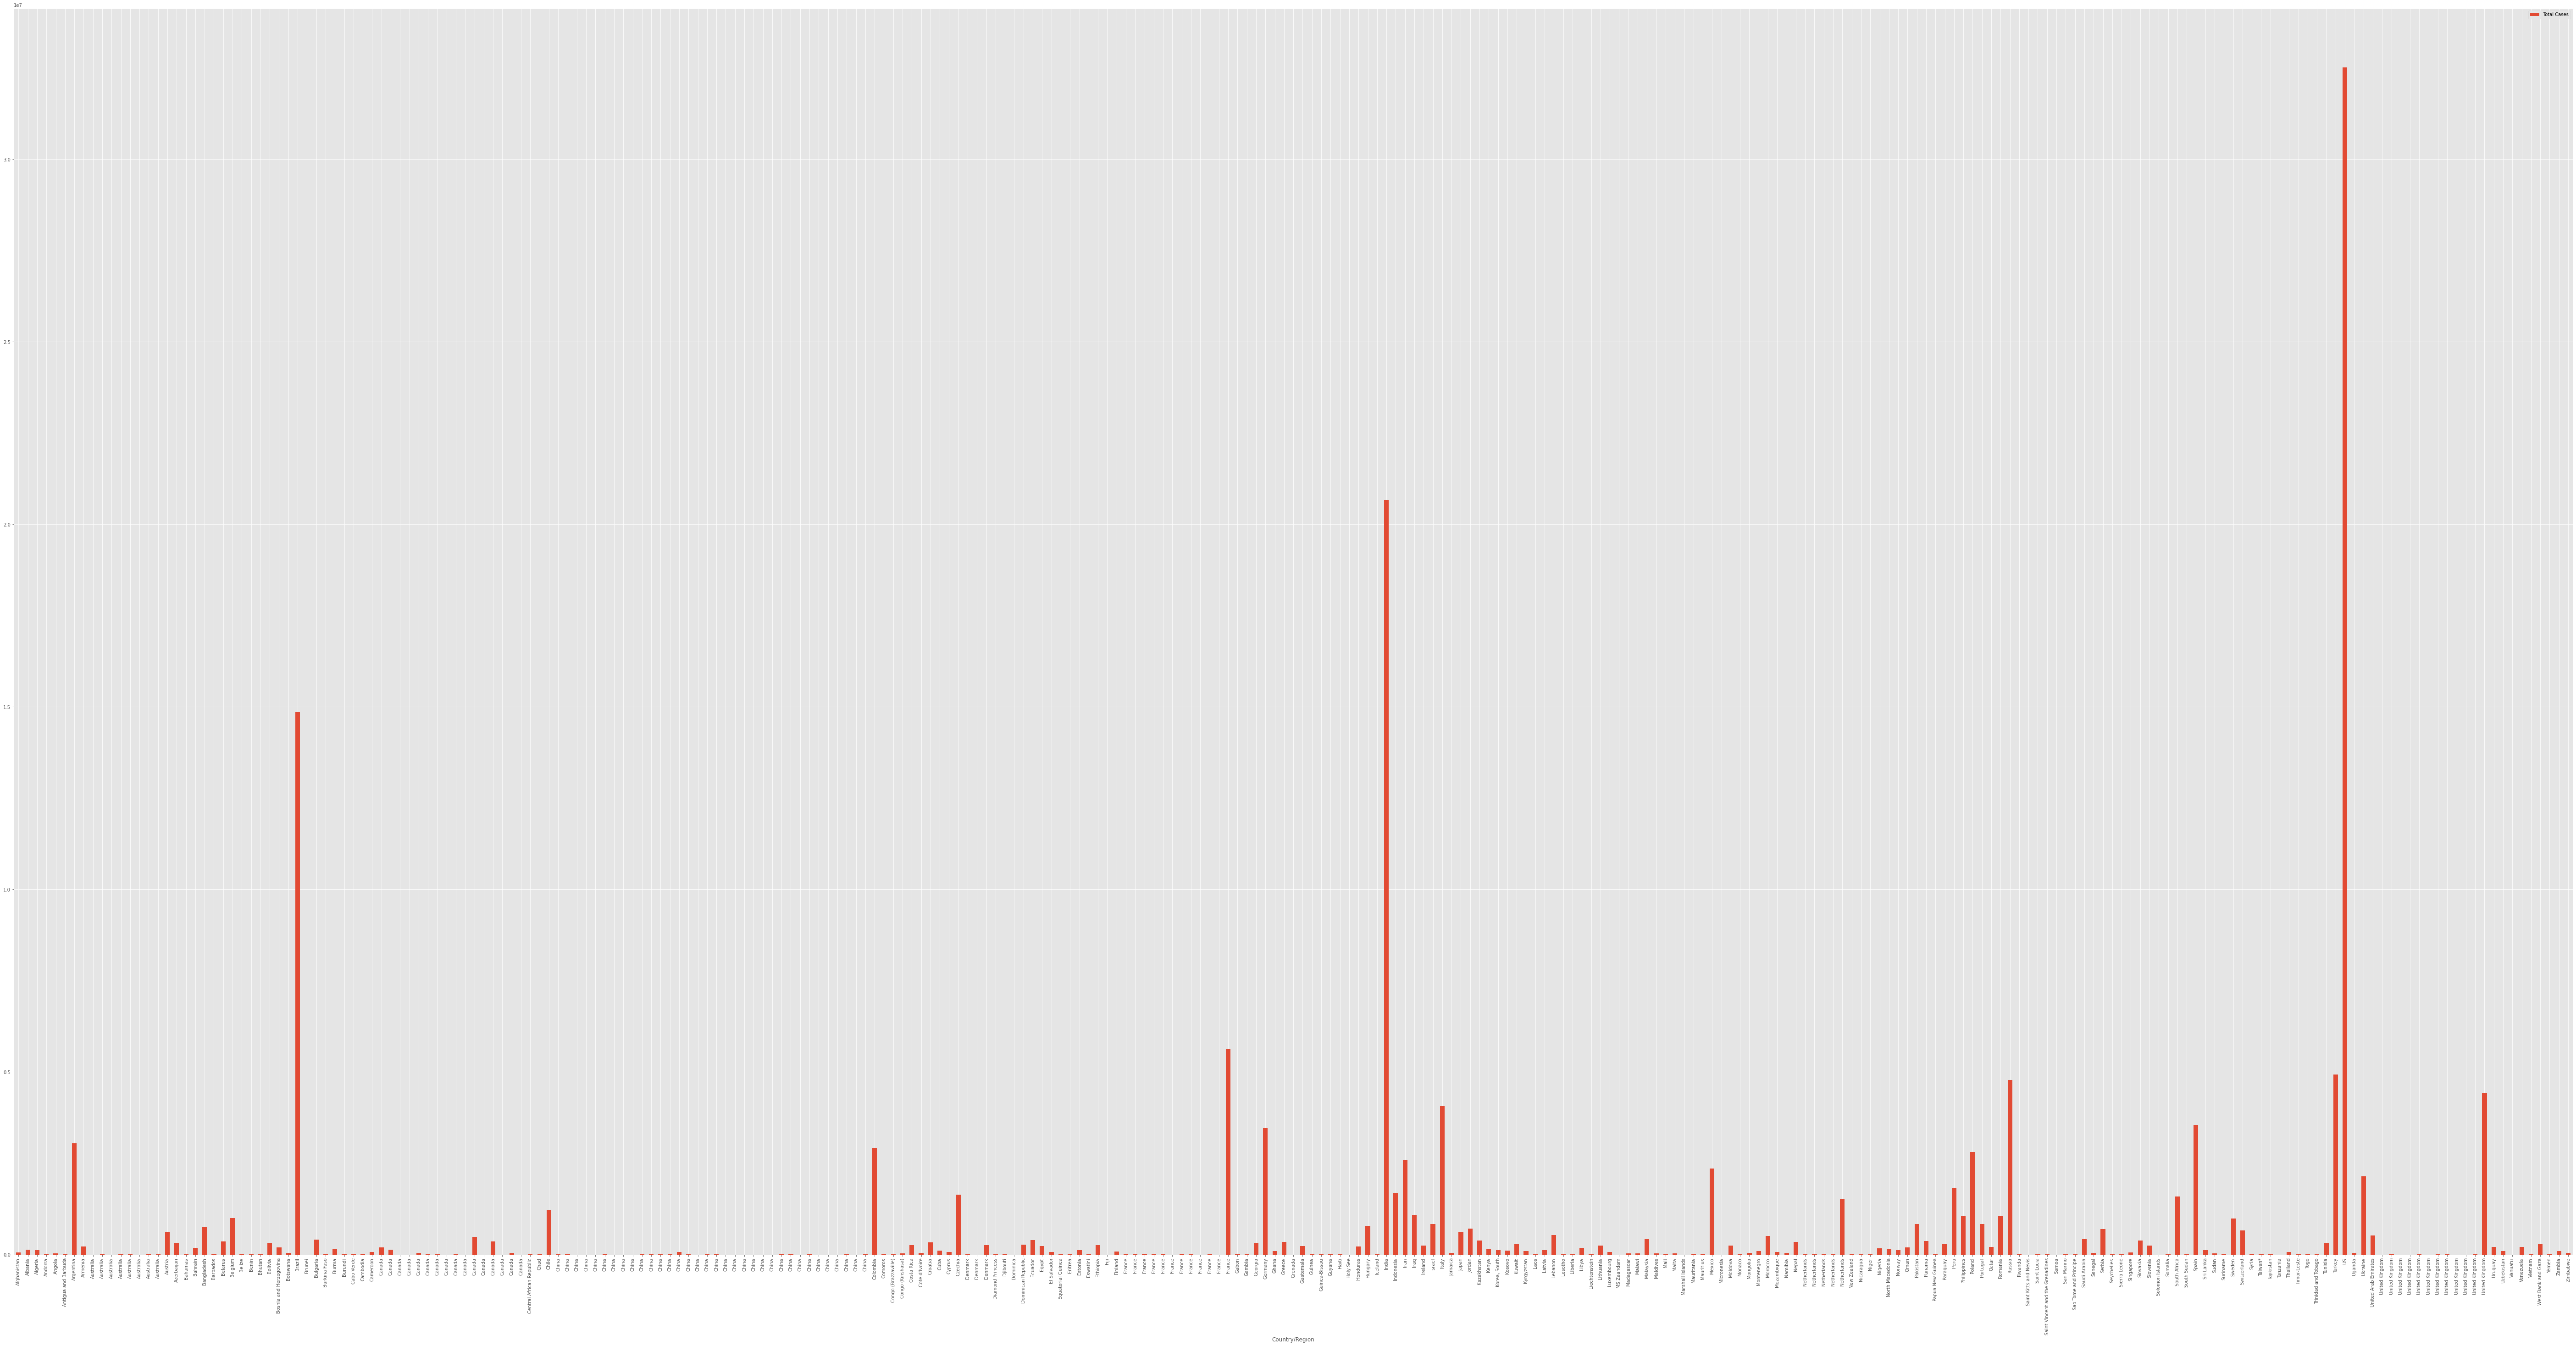

In [103]:
###Pandas visualization
confirmedGlobal.plot(kind='bar',x='Country/Region', y='Total Cases')
plt.show()
###Plotly
confirmedGlobal.iplot(kind='bar',x='Country/Region', y='Total Cases')

<BarContainer object of 275 artists>

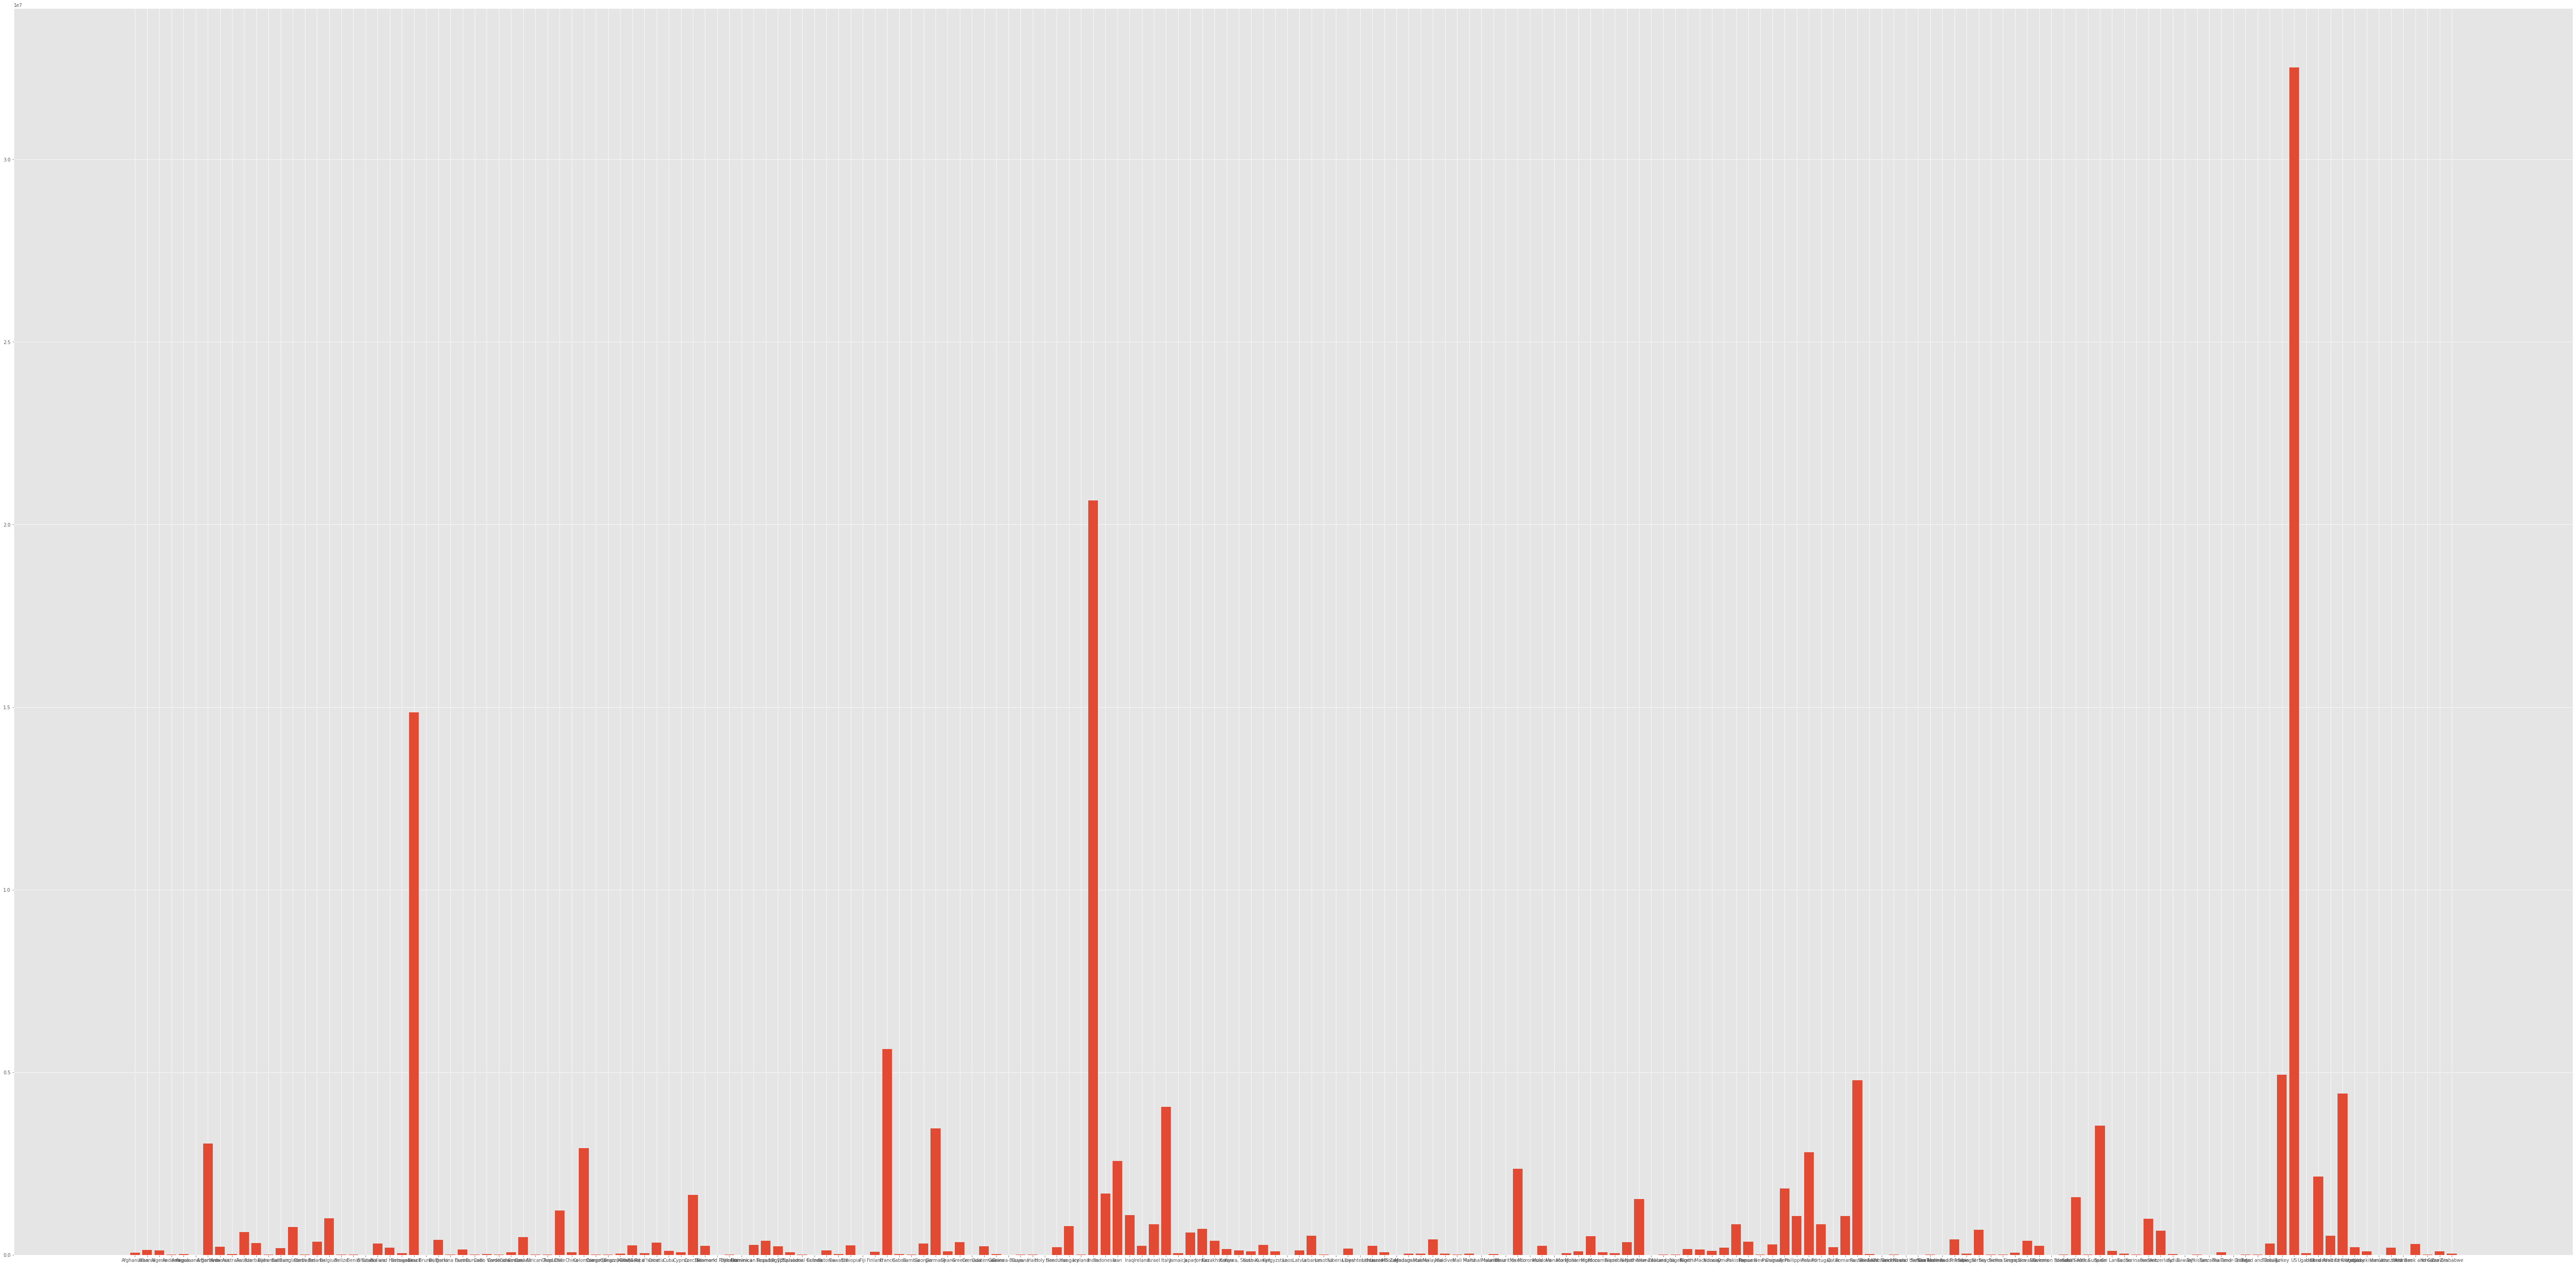

In [104]:
###matplotlib visualization
plt.bar(confirmedGlobal['Country/Region'], confirmedGlobal['Total Cases'])

In [105]:
px.bar(confirmedGlobal, x='Country/Region', y='Total Cases')

<AxesSubplot:xlabel='Country/Region', ylabel='Total Cases'>

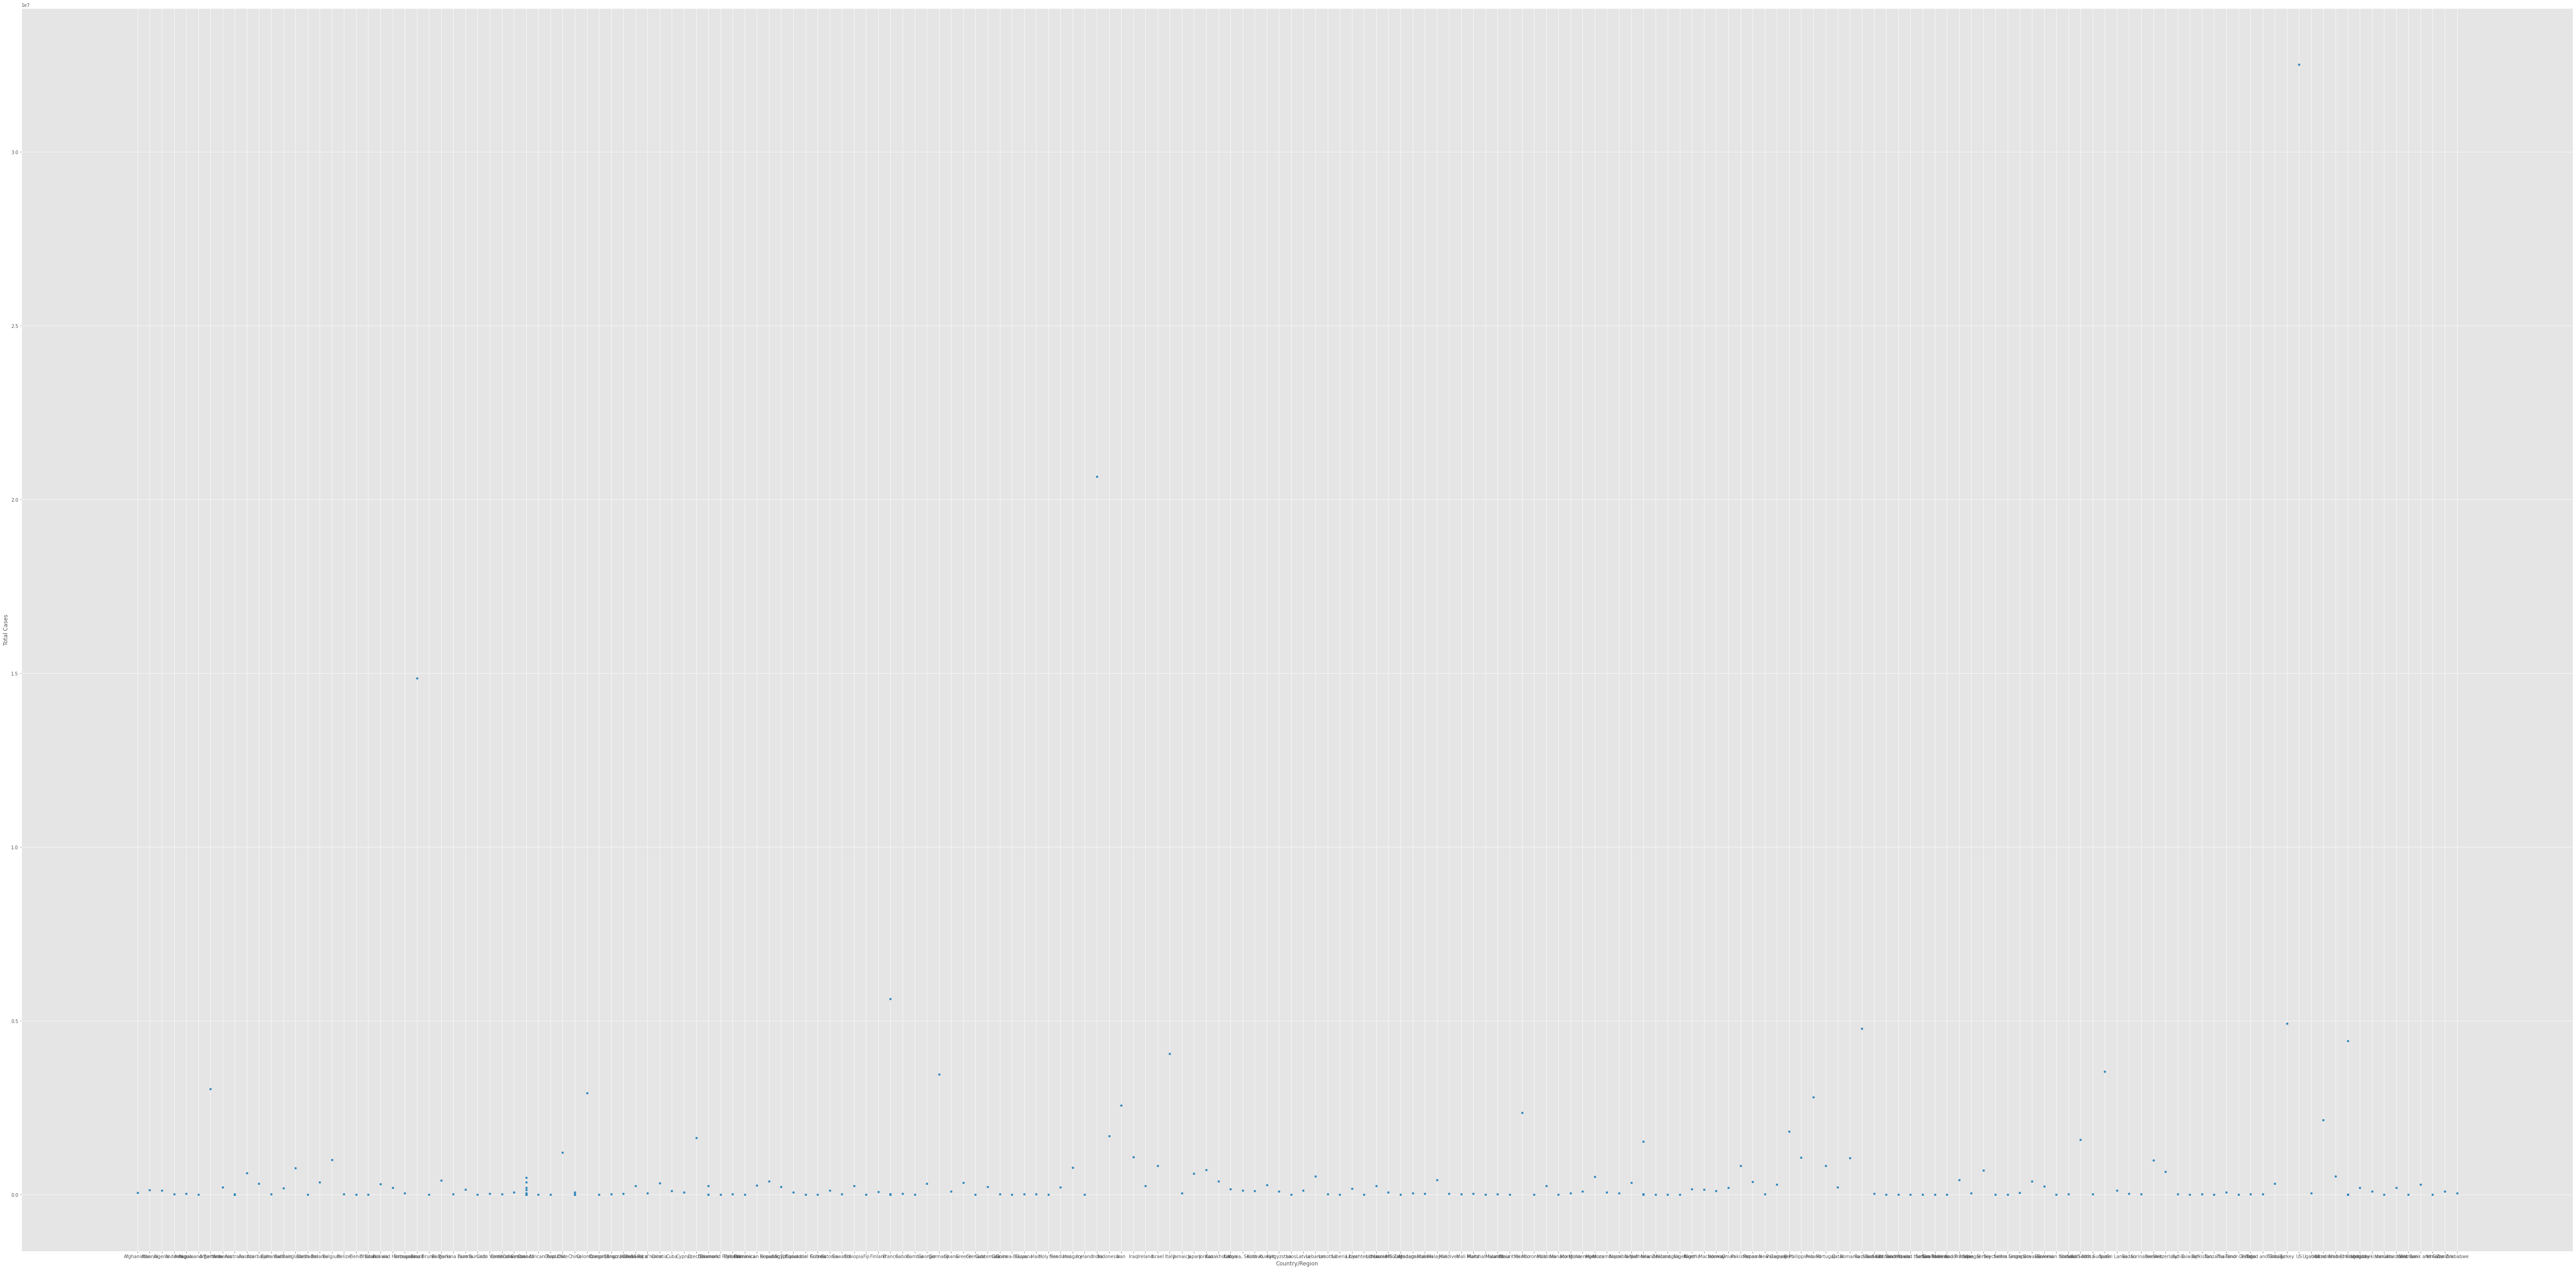

In [106]:
confirmedGlobal.plot(kind='scatter',x='Country/Region', y='Total Cases')

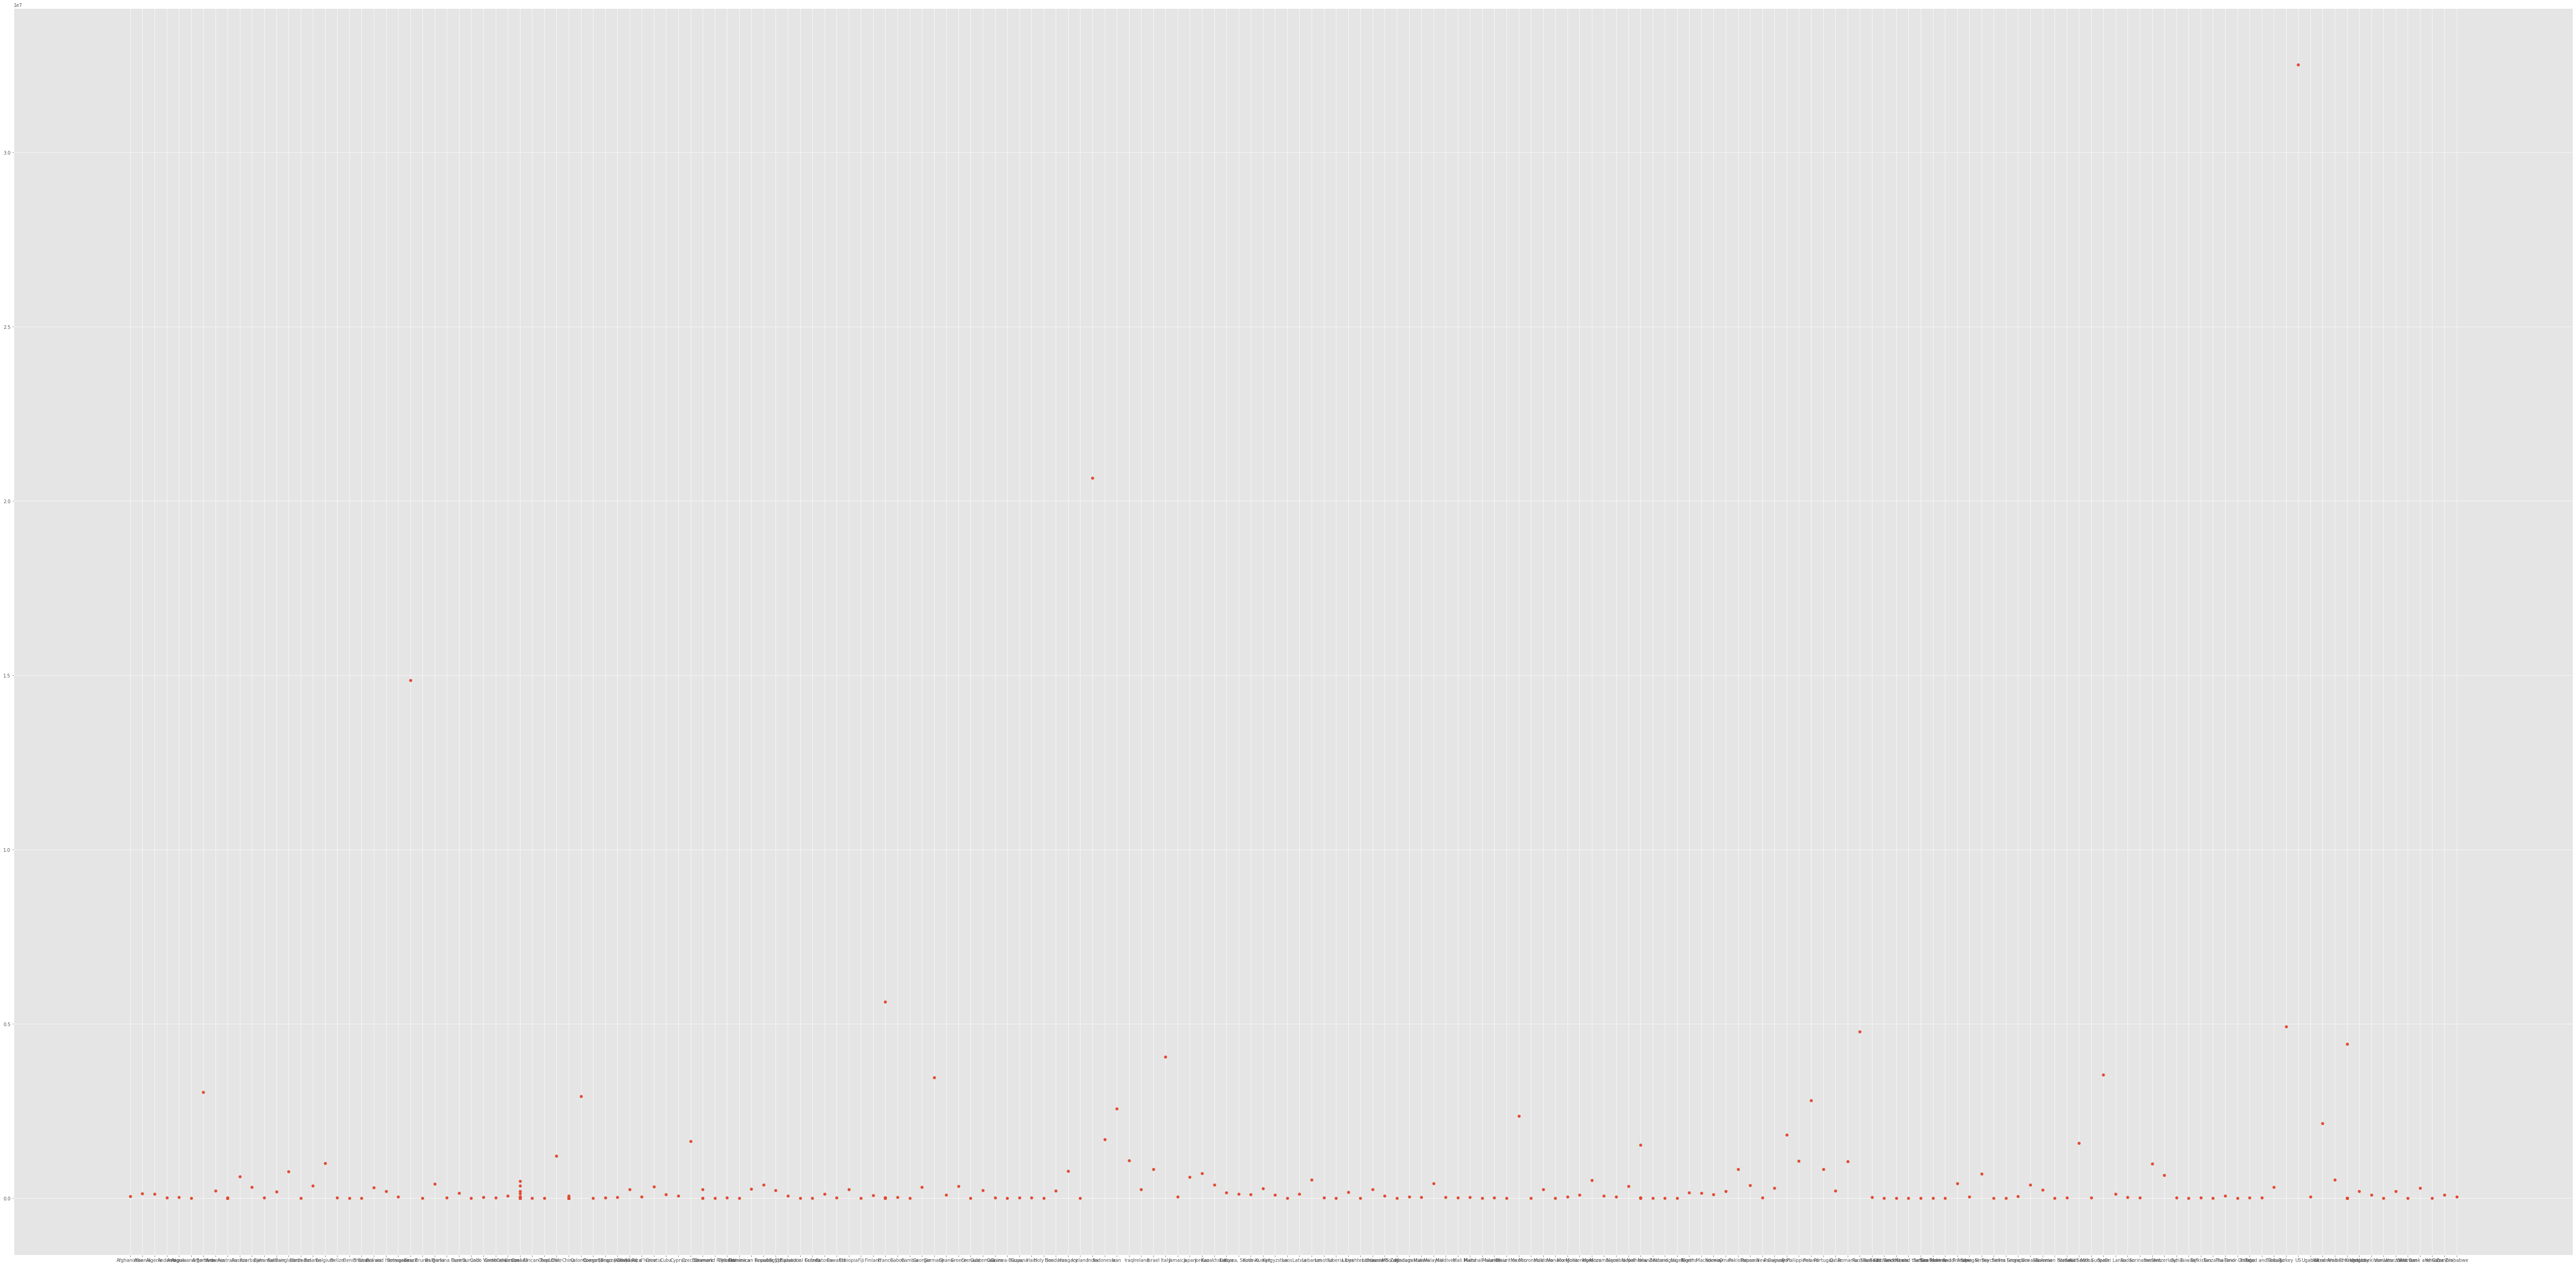

In [107]:
plt.scatter(confirmedGlobal['Country/Region'], confirmedGlobal['Total Cases'])

In [108]:
confirmedGlobal.iplot(kind='scatter',x='Country/Region', y='Total Cases', mode = 'markers+lines',title = 'Covid Infection Distribution',xTitle='Country/Region',yTitle='No. of active cases',colors='red',size=4)
px.scatter(confirmedGlobal, x='Country/Region', y='Total Cases')

In [81]:
## Object Oriented Visualization

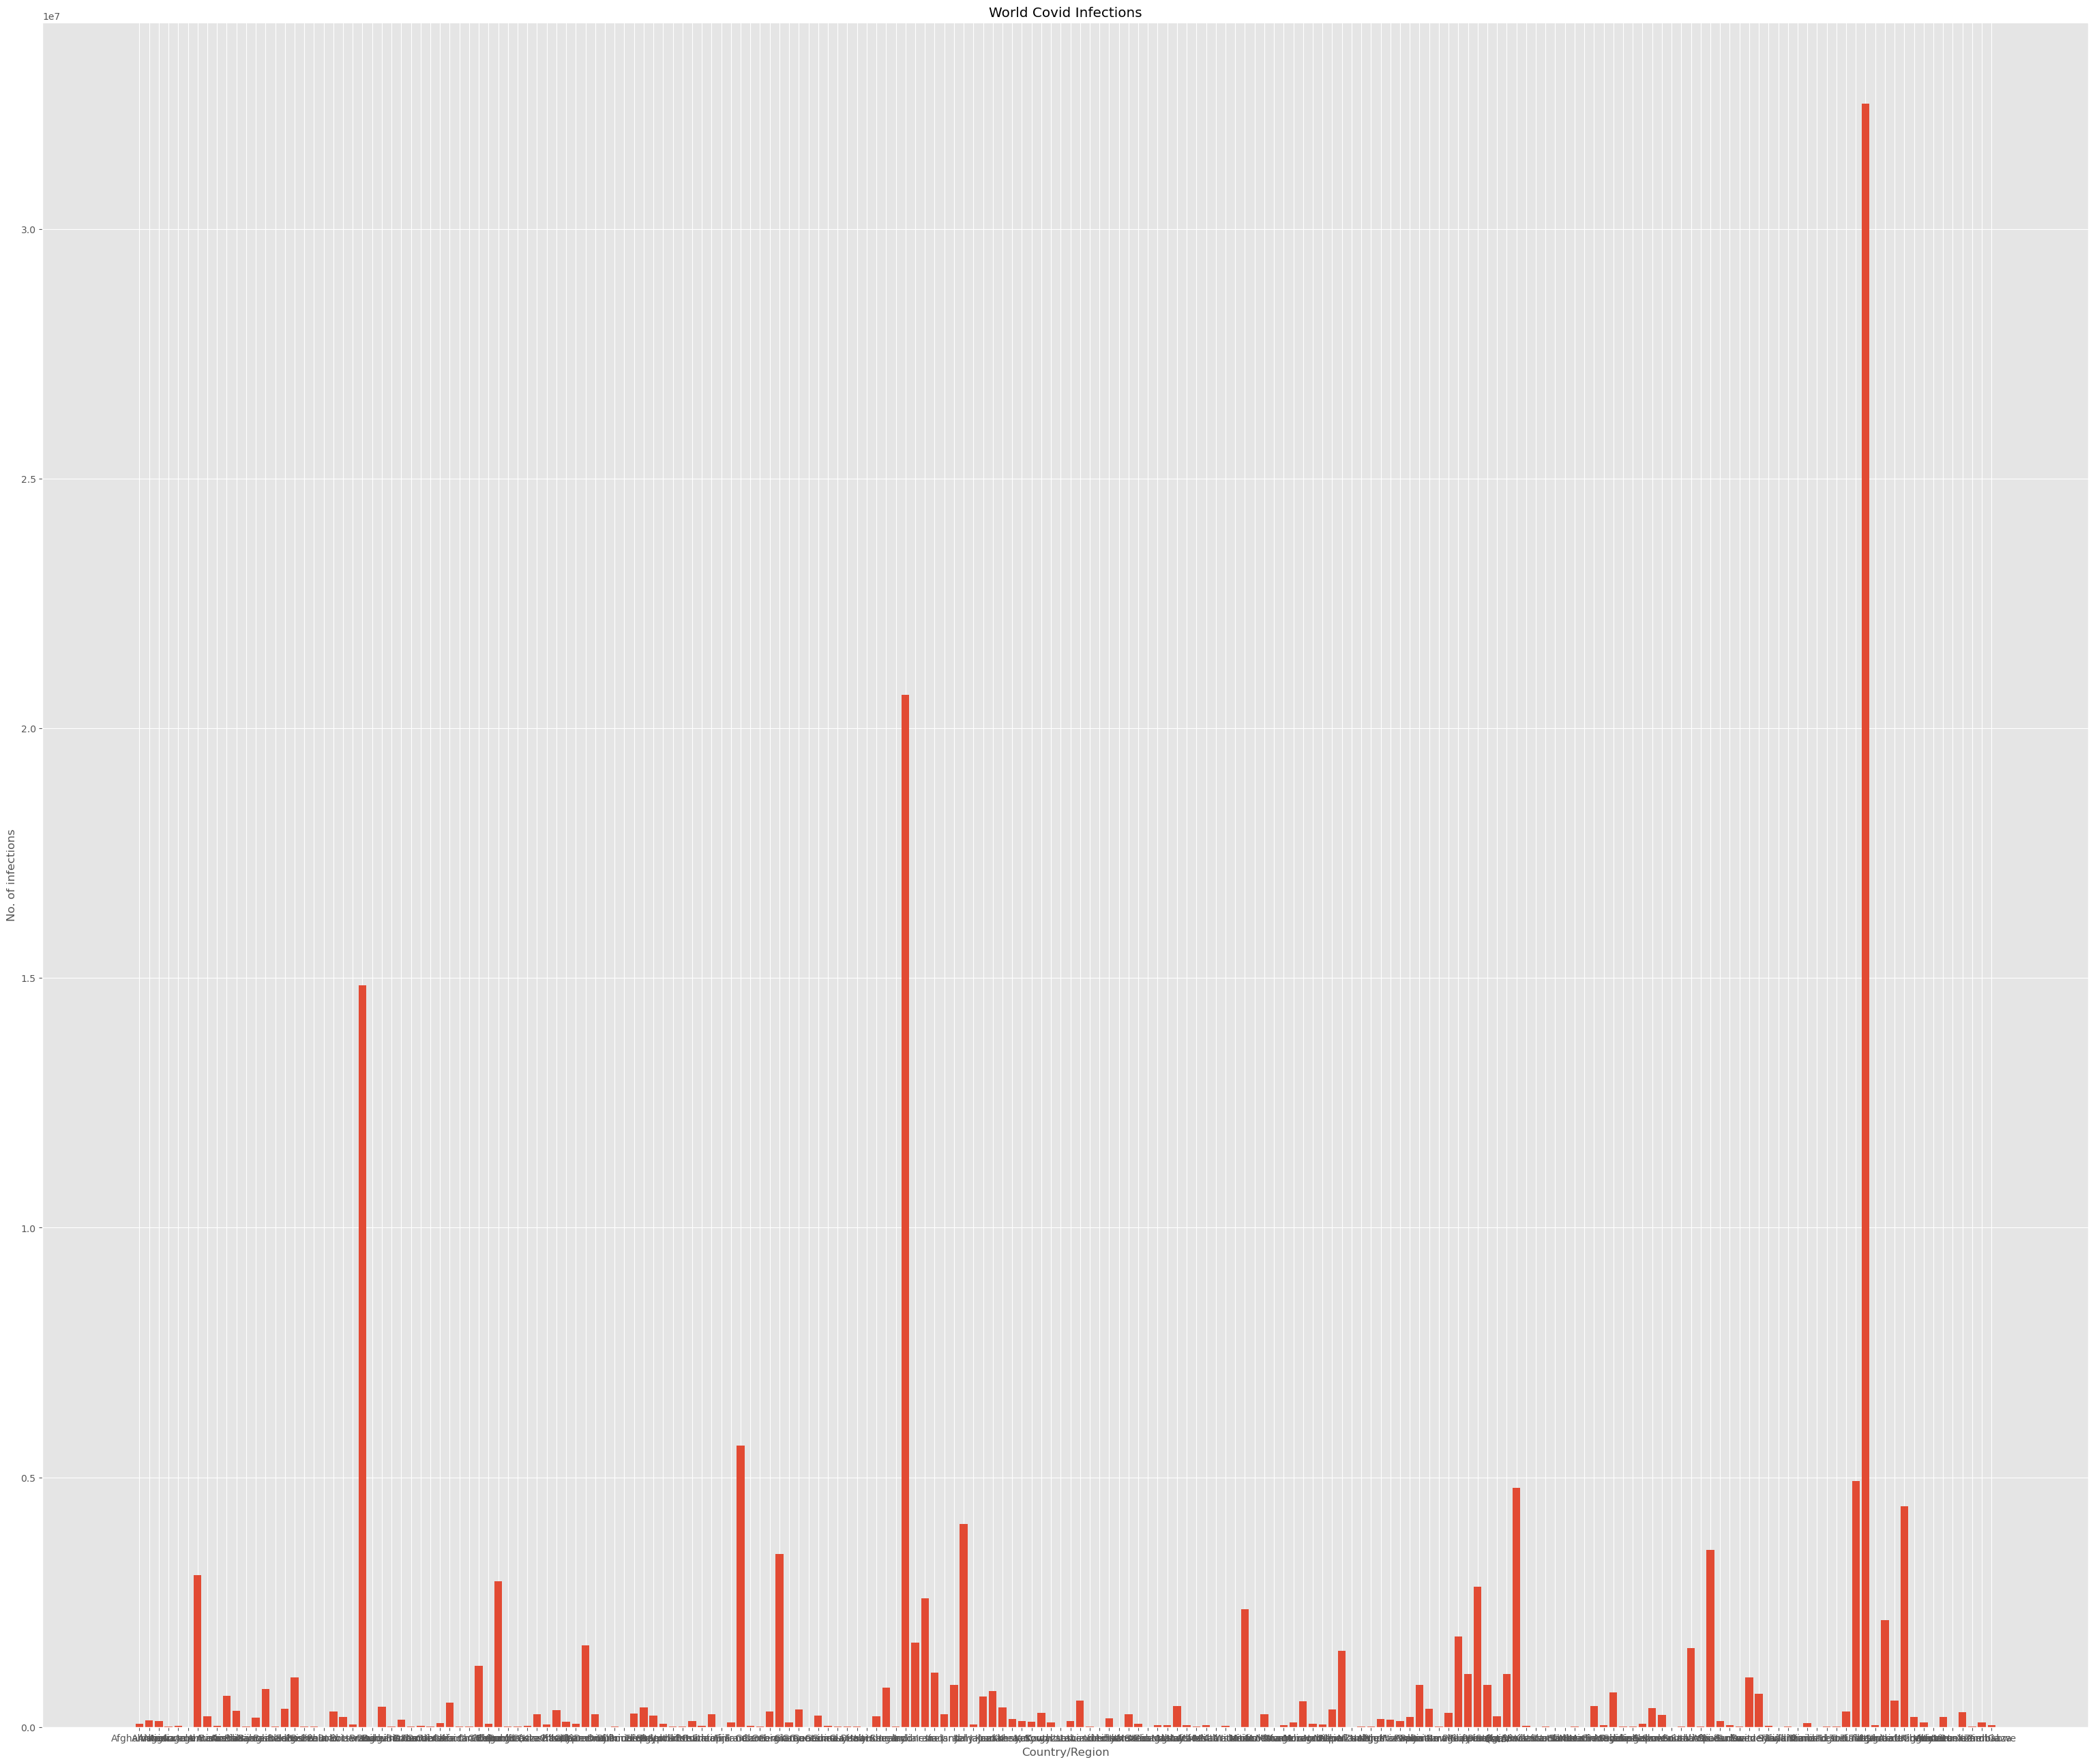

In [109]:
# Matplotlib
fig = plt.figure(figsize=(30,25),dpi=100)
axes = fig.add_axes([0,0,1,1])
axes.bar(confirmedGlobal['Country/Region'], confirmedGlobal['Total Cases'])
axes.set_title('World Covid Infections')
axes.set_xlabel('Country/Region')
axes.set_ylabel('No. of infections')
plt.show()

# Plotly
fig = go.Figure()
fig.add_trace(go.Bar(x = confirmedGlobal['Country/Region'], y = confirmedGlobal['Total Cases']))
fig.update_layout(title='World Covid Infections',xaxis=dict(title='Country/Region'), yaxis=dict(title='No. of infections'))


In [110]:
worldCord = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv',encoding='utf-8',na_values=None)

In [111]:
worldCord 

Province/State      Country/Region        Lat        Long  1/22/20  \
0              NaN         Afghanistan  33.939110   67.709953        0   
1              NaN             Albania  41.153300   20.168300        0   
2              NaN             Algeria  28.033900    1.659600        0   
3              NaN             Andorra  42.506300    1.521800        0   
4              NaN              Angola -11.202700   17.873900        0   
..             ...                 ...        ...         ...      ...   
270            NaN             Vietnam  14.058324  108.277199        0   
271            NaN  West Bank and Gaza  31.952200   35.233200        0   
272            NaN               Yemen  15.552727   48.516388        0   
273            NaN              Zambia -13.133897   27.849332        0   
274            NaN            Zimbabwe -19.015438   29.154857        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  4/25/21  4/26/21  \
0          0        0        0        0        0  ...    58843    59015   
1          0        0        0        0        0  ...   130537   130606   
2          0        0        0        0        0  ...   120922   121112   
3          0        0        0        0        0  ...    13060    13083   
4          0        0        0        0        0  ...    25609    25710   
..       ...      ...      ...      ...      ...  ...      ...      ...   
270        2        2        2        2        2  ...     2843     2852   
271        0        0        0        0        0  ...   290972   292052   
272        0        0        0        0        0  ...     6137     6183   
273        0        0        0        0        0  ...    91358    91378   
274        0        0        0        0        0  ...    38086    38102   

     4/27/21  4/28/21  4/29/21  4/30/21  5/1/21  5/2/21  5/3/21  5/4/21  
0      59225    59370    59576    59745   59939   60122   60300   60563  
1     130736   130859   130977   131085  131185  131238  131276  131327  
2     121344   121580   121866   122108  122311  122522  122717  122999  
3      13121    13148    13198    13232   13232   13282   13295   13316  
4      25942    26168    26431    26652   26815   26993   27133   27284  
..       ...      ...      ...      ...     ...     ...     ...     ...  
270     2857     2865     2910     2928    2942    2962    2985    2995  
271   293466   294550   295601   296462  296462  297638  298203  298921  
272     6220     6263     6294     6317    6325    6341    6363    6390  
273    91418    91484    91533    91586   91670   91693   91722   91804  
274    38164    38191    38235    38257   38260   38281   38293   38327  

[275 rows x 473 columns]

In [112]:
worldCord.drop(worldCord.columns[4:], axis=1,inplace=True)

In [113]:
worldCord

Province/State      Country/Region        Lat        Long
0              NaN         Afghanistan  33.939110   67.709953
1              NaN             Albania  41.153300   20.168300
2              NaN             Algeria  28.033900    1.659600
3              NaN             Andorra  42.506300    1.521800
4              NaN              Angola -11.202700   17.873900
..             ...                 ...        ...         ...
270            NaN             Vietnam  14.058324  108.277199
271            NaN  West Bank and Gaza  31.952200   35.233200
272            NaN               Yemen  15.552727   48.516388
273            NaN              Zambia -13.133897   27.849332
274            NaN            Zimbabwe -19.015438   29.154857

[275 rows x 4 columns]

In [114]:
worldCord.drop(['Province/State'],axis=1,inplace=True)

In [115]:
worldCord

Country/Region        Lat        Long
0           Afghanistan  33.939110   67.709953
1               Albania  41.153300   20.168300
2               Algeria  28.033900    1.659600
3               Andorra  42.506300    1.521800
4                Angola -11.202700   17.873900
..                  ...        ...         ...
270             Vietnam  14.058324  108.277199
271  West Bank and Gaza  31.952200   35.233200
272               Yemen  15.552727   48.516388
273              Zambia -13.133897   27.849332
274            Zimbabwe -19.015438   29.154857

[275 rows x 3 columns]

In [116]:
conGlobal = pd.merge(worldCord,confirmedGlobal,on='Country/Region')

In [117]:
conGlobal

Country/Region        Lat        Long  5/3/21  5/4/21  Total Cases  \
0            Afghanistan  33.939110   67.709953   60300   60563        60563   
1                Albania  41.153300   20.168300  131276  131327       131327   
2                Algeria  28.033900    1.659600  122717  122999       122999   
3                Andorra  42.506300    1.521800   13295   13316        13316   
4                 Angola -11.202700   17.873900   27133   27284        27284   
...                  ...        ...         ...     ...     ...          ...   
1978             Vietnam  14.058324  108.277199    2985    2995         2995   
1979  West Bank and Gaza  31.952200   35.233200  298203  298921       298921   
1980               Yemen  15.552727   48.516388    6363    6390         6390   
1981              Zambia -13.133897   27.849332   91722   91804        91804   
1982            Zimbabwe -19.015438   29.154857   38293   38327        38327   

      Total Active Cases  Deaths  Recovered  
0                 4221.0    2648    53694.0  
1                16299.0    2402   112626.0  
2                34017.0    3289    85693.0  
3                  371.0     127    12818.0  
4                 2485.0     609    24190.0  
...                  ...     ...        ...  
1978                 NaN      35        NaN  
1979                 NaN    3296        NaN  
1980                 NaN    1240        NaN  
1981                 NaN    1254        NaN  
1982                 NaN    1574        NaN  

[1983 rows x 9 columns]

In [120]:
conGlobal.fillna(0)

Country/Region        Lat        Long  5/3/21  5/4/21  Total Cases  \
0            Afghanistan  33.939110   67.709953   60300   60563        60563   
1                Albania  41.153300   20.168300  131276  131327       131327   
2                Algeria  28.033900    1.659600  122717  122999       122999   
3                Andorra  42.506300    1.521800   13295   13316        13316   
4                 Angola -11.202700   17.873900   27133   27284        27284   
...                  ...        ...         ...     ...     ...          ...   
1978             Vietnam  14.058324  108.277199    2985    2995         2995   
1979  West Bank and Gaza  31.952200   35.233200  298203  298921       298921   
1980               Yemen  15.552727   48.516388    6363    6390         6390   
1981              Zambia -13.133897   27.849332   91722   91804        91804   
1982            Zimbabwe -19.015438   29.154857   38293   38327        38327   

      Total Active Cases  Deaths  Recovered  
0                 4221.0    2648    53694.0  
1                16299.0    2402   112626.0  
2                34017.0    3289    85693.0  
3                  371.0     127    12818.0  
4                 2485.0     609    24190.0  
...                  ...     ...        ...  
1978                 0.0      35        0.0  
1979                 0.0    3296        0.0  
1980                 0.0    1240        0.0  
1981                 0.0    1254        0.0  
1982                 0.0    1574        0.0  

[1983 rows x 9 columns]

In [124]:
conGlobal = conGlobal.fillna(0)

In [125]:
conGlobal

Country/Region        Lat        Long  5/3/21  5/4/21  Total Cases  \
0            Afghanistan  33.939110   67.709953   60300   60563        60563   
1                Albania  41.153300   20.168300  131276  131327       131327   
2                Algeria  28.033900    1.659600  122717  122999       122999   
3                Andorra  42.506300    1.521800   13295   13316        13316   
4                 Angola -11.202700   17.873900   27133   27284        27284   
...                  ...        ...         ...     ...     ...          ...   
1978             Vietnam  14.058324  108.277199    2985    2995         2995   
1979  West Bank and Gaza  31.952200   35.233200  298203  298921       298921   
1980               Yemen  15.552727   48.516388    6363    6390         6390   
1981              Zambia -13.133897   27.849332   91722   91804        91804   
1982            Zimbabwe -19.015438   29.154857   38293   38327        38327   

      Total Active Cases  Deaths  Recovered  
0                 4221.0    2648    53694.0  
1                16299.0    2402   112626.0  
2                34017.0    3289    85693.0  
3                  371.0     127    12818.0  
4                 2485.0     609    24190.0  
...                  ...     ...        ...  
1978                 0.0      35        0.0  
1979                 0.0    3296        0.0  
1980                 0.0    1240        0.0  
1981                 0.0    1254        0.0  
1982                 0.0    1574        0.0  

[1983 rows x 9 columns]

In [140]:
map = folium.Map(location=[20,70],zoom_start=4,tiles='Stamenterrain')

for lat,long,value,name in zip(conGlobal['Lat'],conGlobal['Long'],conGlobal['Total Cases'],conGlobal['Country/Region']):
    folium.CircleMarker([lat,long],radius=value*0.000004,popup=('<strong>Country</strong>: '+ str(name).capitalize()+'<br>'+'<strong>Total Cases</strong>: '+ str(value)+'<br>'),fill_color='red',fill_opacity=0.3).add_to(map)
    

In [141]:
map

**Analysing the increasing rate of corona virus**

In [136]:
confirmedGlobal = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv',encoding='utf-8',na_values=None)

In [137]:
confirmedGlobal

Province/State      Country/Region        Lat        Long  1/22/20  \
0              NaN         Afghanistan  33.939110   67.709953        0   
1              NaN             Albania  41.153300   20.168300        0   
2              NaN             Algeria  28.033900    1.659600        0   
3              NaN             Andorra  42.506300    1.521800        0   
4              NaN              Angola -11.202700   17.873900        0   
..             ...                 ...        ...         ...      ...   
270            NaN             Vietnam  14.058324  108.277199        0   
271            NaN  West Bank and Gaza  31.952200   35.233200        0   
272            NaN               Yemen  15.552727   48.516388        0   
273            NaN              Zambia -13.133897   27.849332        0   
274            NaN            Zimbabwe -19.015438   29.154857        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  4/24/21  4/25/21  \
0          0        0        0        0        0  ...    58730    58843   
1          0        0        0        0        0  ...   130409   130537   
2          0        0        0        0        0  ...   120736   120922   
3          0        0        0        0        0  ...    13024    13060   
4          0        0        0        0        0  ...    25492    25609   
..       ...      ...      ...      ...      ...  ...      ...      ...   
270        2        2        2        2        2  ...     2833     2843   
271        0        0        0        0        0  ...   290259   290972   
272        0        0        0        0        0  ...     6105     6137   
273        0        0        0        0        0  ...    91317    91358   
274        0        0        0        0        0  ...    38064    38086   

     4/26/21  4/27/21  4/28/21  4/29/21  4/30/21  5/1/21  5/2/21  5/3/21  
0      59015    59225    59370    59576    59745   59939   60122   60300  
1     130606   130736   130859   130977   131085  131185  131238  131276  
2     121112   121344   121580   121866   122108  122311  122522  122717  
3      13083    13121    13148    13198    13232   13232   13282   13295  
4      25710    25942    26168    26431    26652   26815   26993   27133  
..       ...      ...      ...      ...      ...     ...     ...     ...  
270     2852     2857     2865     2910     2928    2942    2962    2985  
271   292052   293466   294550   295601   296462  296462  297638  298203  
272     6183     6220     6263     6294     6317    6325    6341    6363  
273    91378    91418    91484    91533    91586   91670   91693   91722  
274    38102    38164    38191    38235    38257   38260   38281   38293  

[275 rows x 472 columns]

In [144]:
confirmedGlobal.drop(confirmedGlobal.columns[2:-16], axis=1,inplace=True)

In [145]:
confirmedGlobal

Province/State      Country/Region  4/18/21  4/19/21  4/20/21  4/21/21  \
0              NaN         Afghanistan    57793    57898    58037    58214   
1              NaN             Albania   129594   129694   129842   129980   
2              NaN             Algeria   119642   119805   119992   120174   
3              NaN             Andorra    12805    12805    12874    12917   
4              NaN              Angola    24389    24518    24661    24883   
..             ...                 ...      ...      ...      ...      ...   
270            NaN             Vietnam     2785     2791     2800     2812   
271            NaN  West Bank and Gaza   280741   282270   284280   286028   
272            NaN               Yemen     5812     5858     5918     5960   
273            NaN              Zambia    90918    90942    91042    91119   
274            NaN            Zimbabwe    37751    37859    37875    37980   

     4/22/21  4/23/21  4/24/21  4/25/21  4/26/21  4/27/21  4/28/21  4/29/21  \
0      58312    58542    58730    58843    59015    59225    59370    59576   
1     130114   130270   130409   130537   130606   130736   130859   130977   
2     120363   120562   120736   120922   121112   121344   121580   121866   
3      12942    13007    13024    13060    13083    13121    13148    13198   
4      25051    25279    25492    25609    25710    25942    26168    26431   
..       ...      ...      ...      ...      ...      ...      ...      ...   
270     2824     2830     2833     2843     2852     2857     2865     2910   
271   287680   289120   290259   290972   292052   293466   294550   295601   
272     6020     6056     6105     6137     6183     6220     6263     6294   
273    91189    91251    91317    91358    91378    91418    91484    91533   
274    38018    38045    38064    38086    38102    38164    38191    38235   

     4/30/21  5/1/21  5/2/21  5/3/21  
0      59745   59939   60122   60300  
1     131085  131185  131238  131276  
2     122108  122311  122522  122717  
3      13232   13232   13282   13295  
4      26652   26815   26993   27133  
..       ...     ...     ...     ...  
270     2928    2942    2962    2985  
271   296462  296462  297638  298203  
272     6317    6325    6341    6363  
273    91586   91670   91693   91722  
274    38257   38260   38281   38293  

[275 rows x 18 columns]

In [146]:
risingGlobal = confirmedGlobal

In [147]:
risingGlobal

Province/State      Country/Region  4/18/21  4/19/21  4/20/21  4/21/21  \
0              NaN         Afghanistan    57793    57898    58037    58214   
1              NaN             Albania   129594   129694   129842   129980   
2              NaN             Algeria   119642   119805   119992   120174   
3              NaN             Andorra    12805    12805    12874    12917   
4              NaN              Angola    24389    24518    24661    24883   
..             ...                 ...      ...      ...      ...      ...   
270            NaN             Vietnam     2785     2791     2800     2812   
271            NaN  West Bank and Gaza   280741   282270   284280   286028   
272            NaN               Yemen     5812     5858     5918     5960   
273            NaN              Zambia    90918    90942    91042    91119   
274            NaN            Zimbabwe    37751    37859    37875    37980   

     4/22/21  4/23/21  4/24/21  4/25/21  4/26/21  4/27/21  4/28/21  4/29/21  \
0      58312    58542    58730    58843    59015    59225    59370    59576   
1     130114   130270   130409   130537   130606   130736   130859   130977   
2     120363   120562   120736   120922   121112   121344   121580   121866   
3      12942    13007    13024    13060    13083    13121    13148    13198   
4      25051    25279    25492    25609    25710    25942    26168    26431   
..       ...      ...      ...      ...      ...      ...      ...      ...   
270     2824     2830     2833     2843     2852     2857     2865     2910   
271   287680   289120   290259   290972   292052   293466   294550   295601   
272     6020     6056     6105     6137     6183     6220     6263     6294   
273    91189    91251    91317    91358    91378    91418    91484    91533   
274    38018    38045    38064    38086    38102    38164    38191    38235   

     4/30/21  5/1/21  5/2/21  5/3/21  
0      59745   59939   60122   60300  
1     131085  131185  131238  131276  
2     122108  122311  122522  122717  
3      13232   13232   13282   13295  
4      26652   26815   26993   27133  
..       ...     ...     ...     ...  
270     2928    2942    2962    2985  
271   296462  296462  297638  298203  
272     6317    6325    6341    6363  
273    91586   91670   91693   91722  
274    38257   38260   38281   38293  

[275 rows x 18 columns]

In [163]:
risingGlobal = risingGlobal.sort_values(by='5/1/21',ascending=False)

In [164]:
risingGlobal

Province/State Country/Region   4/18/21   4/19/21   4/20/21   4/21/21  \
250               NaN             US  31670031  31737964  31799237  31862094   
147               NaN          India  15061805  15320972  15616130  15930774   
30                NaN         Brazil  13943071  13973695  14043076  14122795   
130               NaN         France   5249622   5256318   5300321   5334144   
249               NaN         Turkey   4268447   4323596   4384624   4446591   
..                ...            ...       ...       ...       ...       ...   
219               NaN          Samoa         3         3         3         3   
183               NaN     Micronesia         1         1         1         1   
87              Tibet          China         1         1         1         1   
88            Unknown          China         0         0         0         0   
41   Diamond Princess         Canada         0         0         0         0   

      4/22/21   4/23/21   4/24/21   4/25/21   4/26/21   4/27/21   4/28/21  \
250  31929351  31991750  32045113  32077178  32124869  32175725  32230850   
147  16263695  16610481  16960172  17313163  17636186  17997113  18376421   
30   14167973  14237078  14308215  14340787  14369423  14441563  14521289   
130   5367544   5399600   5432085   5456417   5460793   5490025   5521227   
249   4501382   4550820   4591416   4629969   4667281   4710582   4751026   
..        ...       ...       ...       ...       ...       ...       ...   
219         3         3         3         3         3         3         3   
183         1         1         1         1         1         1         1   
87          1         1         1         1         1         1         1   
88          0         0         0         0         0         0         0   
41          0         0         0         0         0         0         0   

      4/29/21   4/30/21    5/1/21    5/2/21    5/3/21  
250  32289049  32346971  32392274  32421641  32472201  
147  18762976  19164969  19557457  19925517  20282833  
30   14590678  14659011  14725975  14754910  14779529  
130   5547670   5571804   5597295   5605532   5609292  
249   4788700   4820591   4849408   4875388   4900121  
..        ...       ...       ...       ...       ...  
219         3         3         3         3         3  
183         1         1         1         1         1  
87          1         1         1         1         1  
88          0         0         0         0         0  
41          0         0         0         0         0  

[275 rows x 18 columns]

In [165]:
risingGlobal['Country/Region'].values.tolist()

['US',
 'India',
 'Brazil',
 'France',
 'Turkey',
 'Russia',
 'United Kingdom',
 'Italy',
 'Spain',
 'Germany',
 'Argentina',
 'Colombia',
 'Poland',
 'Iran',
 'Mexico',
 'Ukraine',
 'Peru',
 'Indonesia',
 'Czechia',
 'South Africa',
 'Netherlands',
 'Chile',
 'Iraq',
 'Romania',
 'Philippines',
 'Belgium',
 'Sweden',
 'Israel',
 'Portugal',
 'Pakistan',
 'Hungary',
 'Bangladesh',
 'Jordan',
 'Serbia',
 'Switzerland',
 'Austria',
 'Japan',
 'Lebanon',
 'United Arab Emirates',
 'Morocco',
 'Canada',
 'Saudi Arabia',
 'Malaysia',
 'Bulgaria',
 'Ecuador',
 'Slovakia',
 'Kazakhstan',
 'Panama',
 'Belarus',
 'Canada',
 'Greece',
 'Croatia',
 'Nepal',
 'Azerbaijan',
 'Georgia',
 'Tunisia',
 'Bolivia',
 'West Bank and Gaza',
 'Paraguay',
 'Kuwait',
 'Dominican Republic',
 'Ethiopia',
 'Denmark',
 'Moldova',
 'Costa Rica',
 'Ireland',
 'Lithuania',
 'Slovenia',
 'Egypt',
 'Guatemala',
 'Armenia',
 'Honduras',
 'Qatar',
 'Uruguay',
 'Venezuela',
 'Bosnia and Herzegovina',
 'Oman',
 'Canada',
 '

In [174]:
risingGlobal[risingGlobal['Country/Region']=='US']

Province/State Country/Region   4/18/21   4/19/21   4/20/21   4/21/21  \
250            NaN             US  31670031  31737964  31799237  31862094   

      4/22/21   4/23/21   4/24/21   4/25/21   4/26/21   4/27/21   4/28/21  \
250  31929351  31991750  32045113  32077178  32124869  32175725  32230850   

      4/29/21   4/30/21    5/1/21    5/2/21    5/3/21  
250  32289049  32346971  32392274  32421641  32472201

In [178]:
risingGlobal[risingGlobal['Country/Region']=='Spain']

Province/State Country/Region  4/18/21  4/19/21  4/20/21  4/21/21  \
234            NaN          Spain  3407283  3428354  3428354  3446072   

     4/22/21  4/23/21  4/24/21  4/25/21  4/26/21  4/27/21  4/28/21  4/29/21  \
234  3456886  3468617  3468617  3468617  3488469  3496134  3504799  3514942   

     4/30/21   5/1/21   5/2/21   5/3/21  
234  3524077  3524077  3524077  3540430

In [179]:
risingGlobal[risingGlobal['Country/Region']=='Kenya']

Province/State Country/Region  4/18/21  4/19/21  4/20/21  4/21/21  \
158            NaN          Kenya   151653   151894   152523   153488   

     4/22/21  4/23/21  4/24/21  4/25/21  4/26/21  4/27/21  4/28/21  4/29/21  \
158   154392   155165   156318   156787   156981   157492   158326   158821   

     4/30/21  5/1/21  5/2/21  5/3/21  
158   159318  160053  160422  160559

In [180]:
risingGlobal[risingGlobal['Country/Region']=='Uganda']

Province/State Country/Region  4/18/21  4/19/21  4/20/21  4/21/21  \
251            NaN         Uganda    41378    41396    41422    41475   

     4/22/21  4/23/21  4/24/21  4/25/21  4/26/21  4/27/21  4/28/21  4/29/21  \
251    41529    41575    41575    41655    41715    41737    41766    41797   

     4/30/21  5/1/21  5/2/21  5/3/21  
251    41866   41905   41905   41973

In [ ]:
# matplotlib

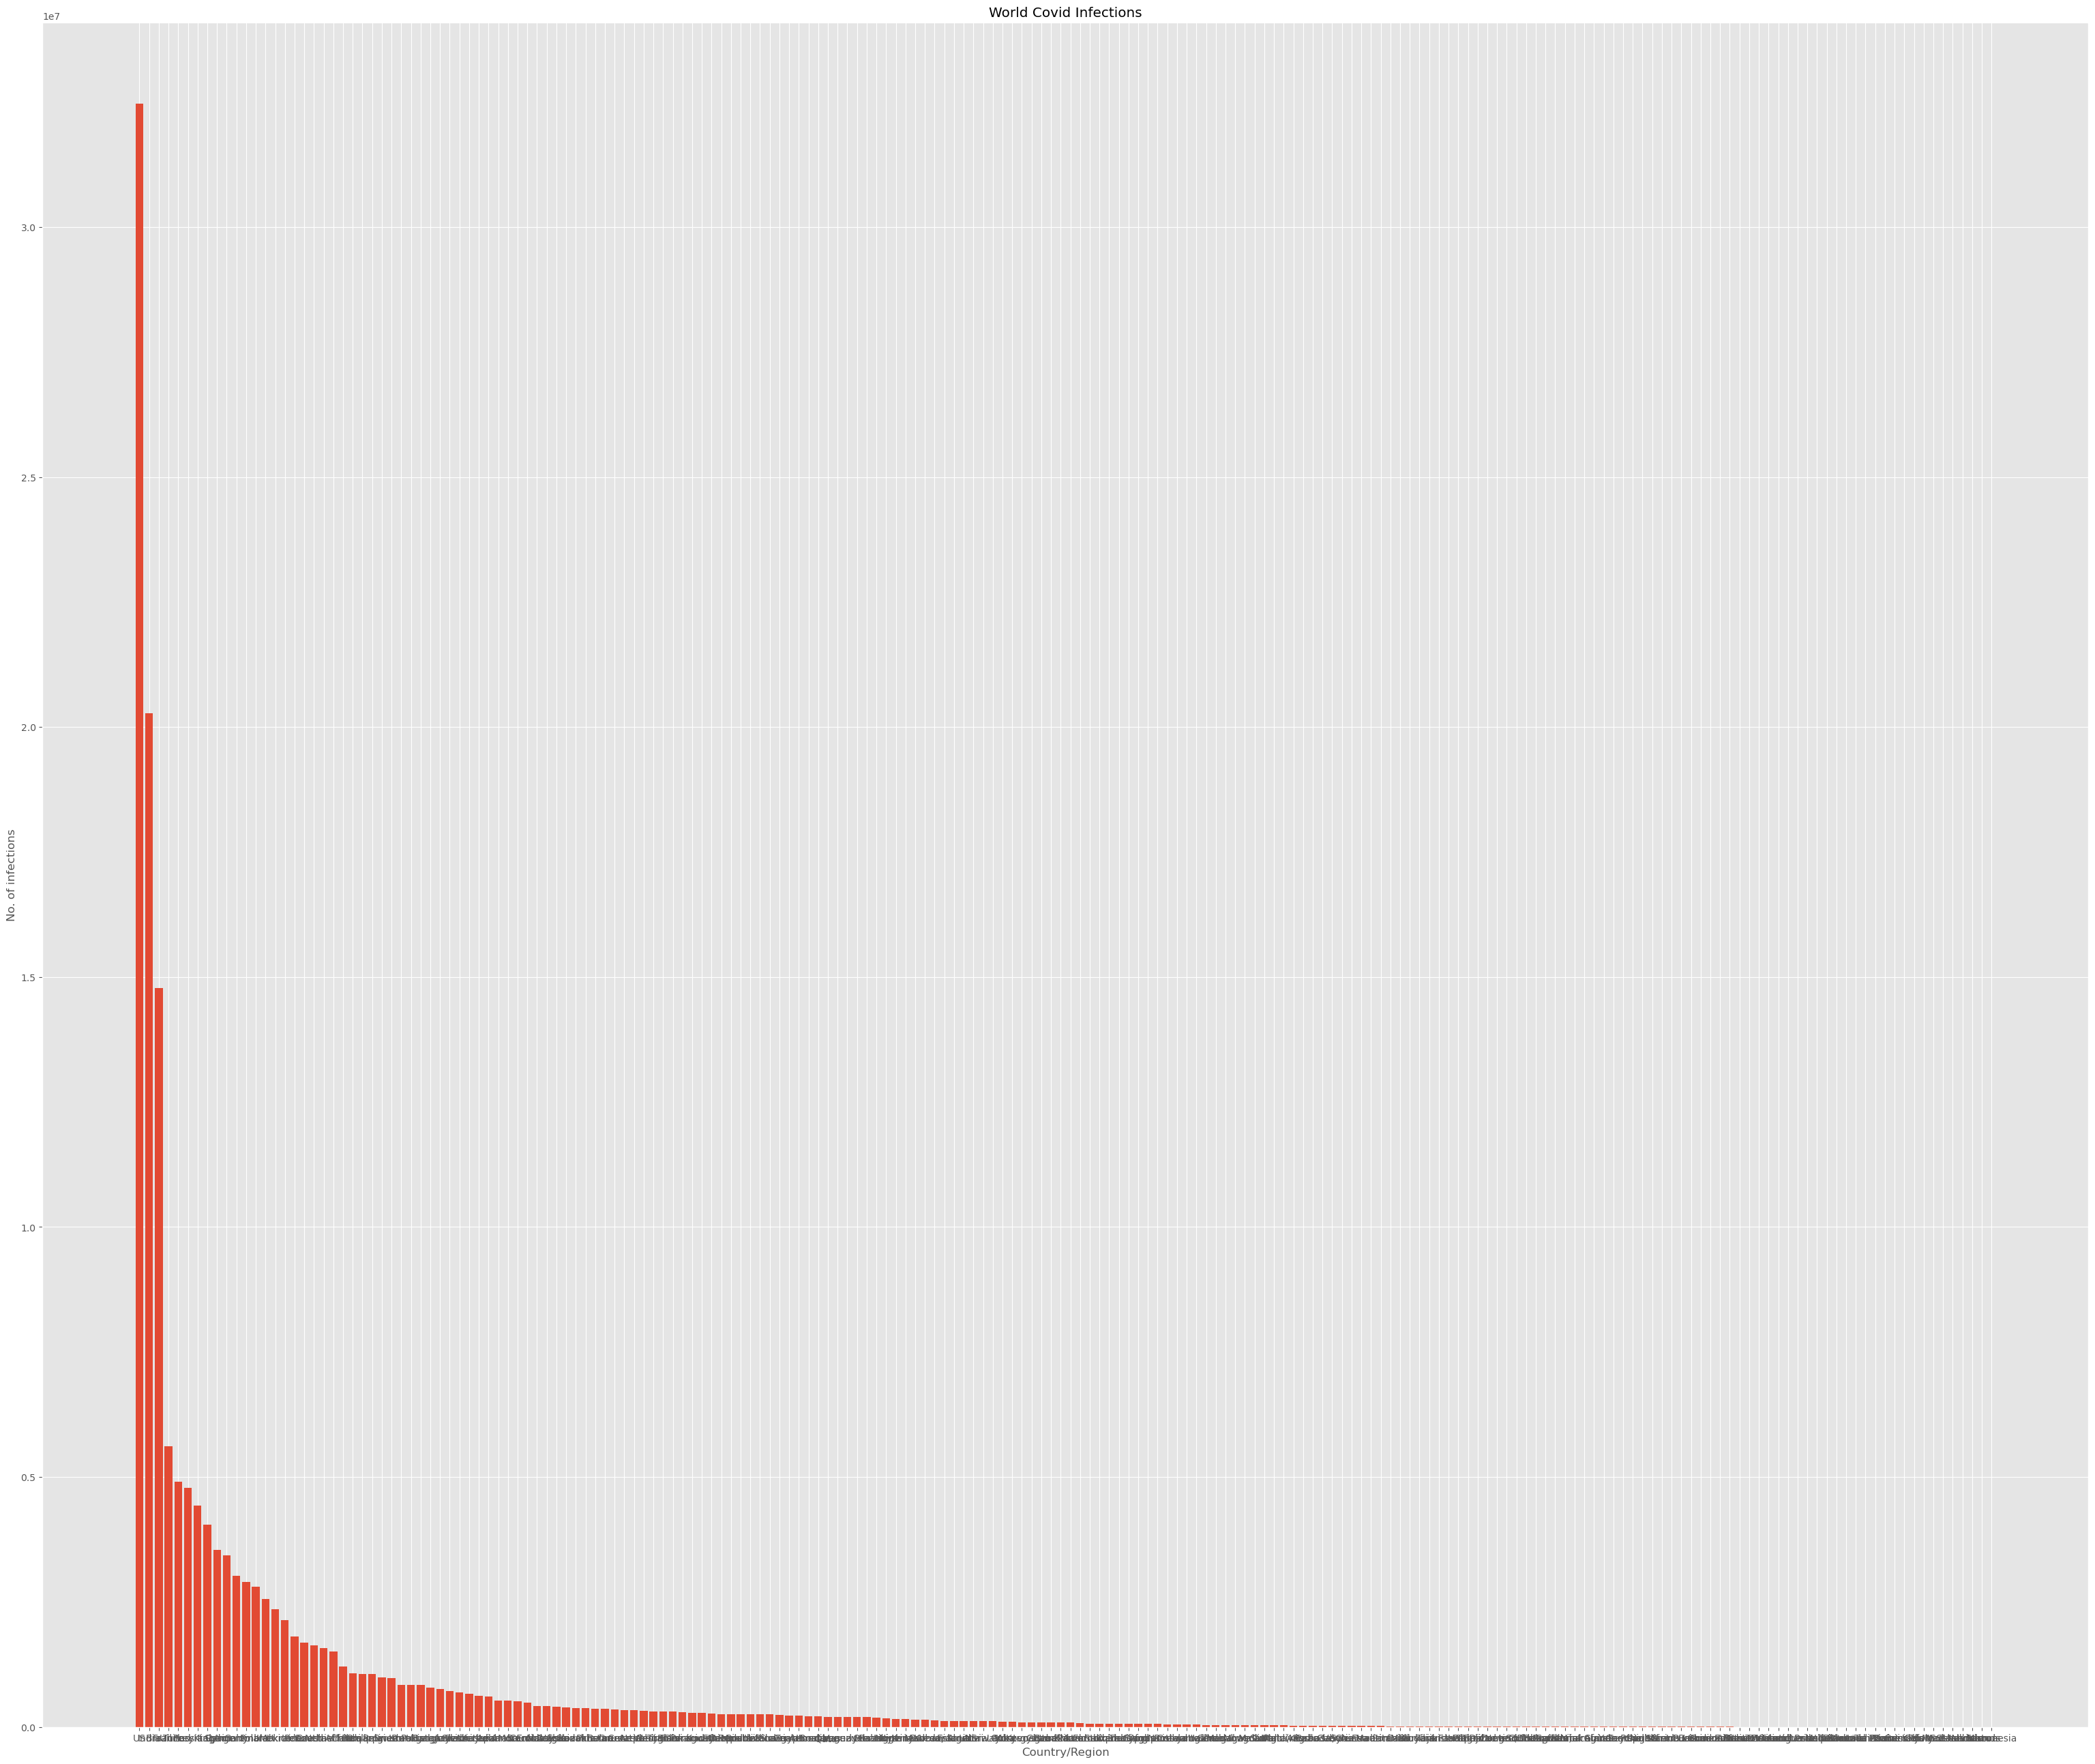

In [205]:
fig = plt.figure(figsize=(30,25),dpi=100)
axes = fig.add_axes([0,0,1,1])
axes.bar(risingGlobal['Country/Region'], risingGlobal[risingGlobal.columns[-1]])
axes.set_title('World Covid Infections')
axes.set_xlabel('Country/Region')
axes.set_ylabel('No. of infections')
plt.show()

# Plotly
fig = go.Figure()
fig.add_trace(go.Bar(x = risingGlobal['Country/Region'], y = risingGlobal[risingGlobal.columns[-1]]))
fig.update_layout(title='World Covid Infections',xaxis=dict(title='Country/Region'), yaxis=dict(title='No. of infections'))

# Plotly express
fig=px.bar(risingGlobal,x='Country/Region', y='5/3/21' ,color='5/3/21',title='World infections')
fig.show()

In [206]:
# subplots by bar graph

In [207]:
from plotly.subplots import make_subplots

In [213]:
fig=make_subplots(
    rows=2,cols=2,specs=[[{"secondary_y":True},{"secondary_y":True}],[{"secondary_y":True},{"secondary_y":True}]],
    subplot_titles=('Total Cases', 'Recovered', 'Deaths', 'Vaccinated'))

fig.add_trace(go.Bar(x = risingGlobal['Country/Region'], y = risingGlobal['5/3/21'],
               marker=dict(color=risingGlobal['5/3/21'],coloraxis = "coloraxis")),1,1)
              
fig.add_trace(go.Bar(x = risingGlobal['Country/Region'], y = risingGlobal['5/3/21'],
               marker=dict(color=risingGlobal['5/3/21'],coloraxis = "coloraxis")),1,2)

fig.add_trace(go.Bar(x = risingGlobal['Country/Region'], y = risingGlobal['5/3/21'],
               marker=dict(color=risingGlobal['5/3/21'],coloraxis = "coloraxis")),2,1)
              
fig.add_trace(go.Bar(x = risingGlobal['Country/Region'], y = risingGlobal['5/3/21'],
               marker=dict(color=risingGlobal['5/3/21'],coloraxis = "coloraxis")),2,2)
              
fig.update_layout(coloraxis=dict(colorscale='Bluered_r'),showlegend = False,title_text='World Covid Infections')
fig.update_layout(plot_bgcolor='rgb(230,230,230)')              

In [214]:
fig=make_subplots(
    rows=2,cols=2,specs=[[{"secondary_y":True},{"secondary_y":True}],[{"secondary_y":True},{"secondary_y":True}]],
    subplot_titles=('Total Cases', 'Recovered', 'Deaths', 'Vaccinated'))

fig.add_trace(go.Scatter(x = risingGlobal['Country/Region'], y = risingGlobal['5/3/21'],
               marker=dict(color=risingGlobal['5/3/21'],coloraxis = "coloraxis")),1,1)
              
fig.add_trace(go.Scatter(x = risingGlobal['Country/Region'], y = risingGlobal['5/3/21'],
               marker=dict(color=risingGlobal['5/3/21'],coloraxis = "coloraxis")),1,2)

fig.add_trace(go.Scatter(x = risingGlobal['Country/Region'], y = risingGlobal['5/3/21'],
               marker=dict(color=risingGlobal['5/3/21'],coloraxis = "coloraxis")),2,1)
              
fig.add_trace(go.Scatter(x = risingGlobal['Country/Region'], y = risingGlobal['5/3/21'],
               marker=dict(color=risingGlobal['5/3/21'],coloraxis = "coloraxis")),2,2)
              
fig.update_layout(coloraxis=dict(colorscale='Bluered_r'),showlegend = False,title_text='World Covid Infections')
fig.update_layout(plot_bgcolor='rgb(230,230,230)')          

**World Data**

In [43]:
df= pd.read_csv(r'C:\Users\Bill\Documents\Project files\Data Science Projects\Jupyter notebook\covid_19_data.csv',parse_dates=['Last Update'])

In [44]:
df.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'},inplace=True)

In [45]:
df

SNo        Date                Province/State  \
0        1  01/22/2020                         Anhui   
1        2  01/22/2020                       Beijing   
2        3  01/22/2020                     Chongqing   
3        4  01/22/2020                        Fujian   
4        5  01/22/2020                         Gansu   
...    ...         ...                           ...   
5885  5886  03/15/2020                     Gibraltar   
5886  5887  03/15/2020                           NaN   
5887  5888  03/15/2020  Diamond Princess cruise ship   
5888  5889  03/15/2020                 West Virginia   
5889  5890  03/15/2020                           NaN   

                             Country         Last Update  Confirmed  Deaths  \
0                     Mainland China 2020-01-22 17:00:00        1.0     0.0   
1                     Mainland China 2020-01-22 17:00:00       14.0     0.0   
2                     Mainland China 2020-01-22 17:00:00        6.0     0.0   
3                     Mainland China 2020-01-22 17:00:00        1.0     0.0   
4                     Mainland China 2020-01-22 17:00:00        0.0     0.0   
...                              ...                 ...        ...     ...   
5885                              UK 2020-03-14 16:33:03        1.0     0.0   
5886                      Uzbekistan 2020-03-15 18:20:19        1.0     0.0   
5887                       Australia 2020-03-14 02:33:04        0.0     0.0   
5888                              US 2020-03-10 02:33:04        0.0     0.0   
5889  occupied Palestinian territory 2020-03-11 20:53:02        0.0     0.0   

      Recovered  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  
...         ...  
5885        1.0  
5886        0.0  
5887        0.0  
5888        0.0  
5889        0.0  

[5890 rows x 8 columns]

In [46]:
df.query('Country=="US"')

SNo        Date        Province/State Country         Last Update  \
31      32  01/22/2020            Washington      US 2020-01-22 17:00:00   
69      70  01/23/2020            Washington      US 2020-01-23 17:00:00   
117    118  01/24/2020            Washington      US 2020-01-24 17:00:00   
118    119  01/24/2020               Chicago      US 2020-01-24 17:00:00   
158    159  01/25/2020            Washington      US 2020-01-25 17:00:00   
...    ...         ...                   ...     ...                 ...   
5831  5832  03/15/2020               Wyoming      US 2020-03-15 02:53:03   
5882  5883  03/15/2020                Alaska      US 2020-03-13 14:53:03   
5883  5884  03/15/2020          North Dakota      US 2020-03-12 09:33:03   
5884  5885  03/15/2020  Virgin Islands, U.S.      US 2020-03-14 16:15:18   
5888  5889  03/15/2020         West Virginia      US 2020-03-10 02:33:04   

      Confirmed  Deaths  Recovered  
31          1.0     0.0        0.0  
69          1.0     0.0        0.0  
117         1.0     0.0        0.0  
118         1.0     0.0        0.0  
158         1.0     0.0        0.0  
...         ...     ...        ...  
5831        3.0     0.0        0.0  
5882        1.0     0.0        0.0  
5883        1.0     0.0        0.0  
5884        1.0     0.0        0.0  
5888        0.0     0.0        0.0  

[1218 rows x 8 columns]

In [47]:
df.groupby('Date').sum()

SNo  Confirmed  Deaths  Recovered
Date                                             
01/22/2020      741      555.0    17.0       28.0
01/23/2020     2829      653.0    18.0       30.0
01/24/2020     4305      941.0    26.0       36.0
01/25/2020     6490     1438.0    42.0       39.0
01/26/2020     9071     2118.0    56.0       52.0
01/27/2020    12342     2927.0    82.0       61.0
01/28/2020    15262     5578.0   131.0      107.0
01/29/2020    18711     6165.0   133.0      126.0
01/30/2020    23345     8235.0   171.0      143.0
01/31/2020    28675     9925.0   213.0      222.0
02/01/2020    35309    12038.0   259.0      284.0
02/02/2020    39798    16787.0   362.0      472.0
02/03/2020    44982    19881.0   426.0      623.0
02/04/2020    51135    23892.0   492.0      852.0
02/05/2020    56871    27636.0   564.0     1124.0
02/06/2020    61912    30818.0   634.0     1487.0
02/07/2020    67932    34392.0   719.0     2011.0
02/08/2020    73116    37121.0   806.0     2616.0
02/09/2020    78300    40151.0   906.0     3244.0
02/10/2020    83484    42763.0  1013.0     3946.0
02/11/2020    89936    44803.0  1113.0     4683.0
02/12/2020    95265    45222.0  1118.0     5150.0
02/13/2020   102009    60370.0  1371.0     6295.0
02/14/2020   108975    66887.0  1523.0     8058.0
02/15/2020   114600    69032.0  1666.0     9395.0
02/16/2020   120225    71226.0  1770.0    10865.0
02/17/2020   125850    73260.0  1868.0    12583.0
02/18/2020   131475    75138.0  2007.0    14352.0
02/19/2020   138966    75641.0  2122.0    16121.0
02/20/2020   144742    76199.0  2247.0    18177.0
02/21/2020   166698    76843.0  2251.0    18890.0
02/22/2020   173754    78599.0  2458.0    22886.0
02/23/2020   183005    78985.0  2469.0    23394.0
02/24/2020   201645    79570.0  2629.0    25227.0
02/25/2020   219255    80415.0  2708.0    27905.0
02/26/2020   245430    81397.0  2770.0    30384.0
02/27/2020   265965    82756.0  2814.0    33277.0
02/28/2020   301245    84124.0  2872.0    36711.0
02/29/2020   328321    86013.0  2941.0    39782.0
03/01/2020   360125    88371.0  2996.0    42716.0
03/02/2020   424974    90309.0  3085.0    45602.0
03/03/2020   477160    92844.0  3160.0    48229.0
03/04/2020   530480    95124.0  3254.0    51171.0
03/05/2020   602386    97886.0  3348.0    53797.0
03/06/2020   729932   101800.0  3460.0    55866.0
03/07/2020   873000   105836.0  3558.0    58359.0
03/08/2020  1050600   109835.0  3803.0    60695.0
03/09/2020  1165213   113582.0  3996.0    62512.0
03/10/2020   950999   118582.0  4262.0    64404.0
03/11/2020  1042740   125865.0  4615.0    67003.0
03/12/2020  1099701   128343.0  4720.0    68324.0
03/13/2020  1211755   145193.0  5404.0    70251.0
03/14/2020  1371492   156099.0  5819.0    72624.0
03/15/2020  1486467   167447.0  6440.0    76034.0

In [48]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths= df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

In [49]:
confirmed

Date  Confirmed
0   01/22/2020      555.0
1   01/23/2020      653.0
2   01/24/2020      941.0
3   01/25/2020     1438.0
4   01/26/2020     2118.0
5   01/27/2020     2927.0
6   01/28/2020     5578.0
7   01/29/2020     6165.0
8   01/30/2020     8235.0
9   01/31/2020     9925.0
10  02/01/2020    12038.0
11  02/02/2020    16787.0
12  02/03/2020    19881.0
13  02/04/2020    23892.0
14  02/05/2020    27636.0
15  02/06/2020    30818.0
16  02/07/2020    34392.0
17  02/08/2020    37121.0
18  02/09/2020    40151.0
19  02/10/2020    42763.0
20  02/11/2020    44803.0
21  02/12/2020    45222.0
22  02/13/2020    60370.0
23  02/14/2020    66887.0
24  02/15/2020    69032.0
25  02/16/2020    71226.0
26  02/17/2020    73260.0
27  02/18/2020    75138.0
28  02/19/2020    75641.0
29  02/20/2020    76199.0
30  02/21/2020    76843.0
31  02/22/2020    78599.0
32  02/23/2020    78985.0
33  02/24/2020    79570.0
34  02/25/2020    80415.0
35  02/26/2020    81397.0
36  02/27/2020    82756.0
37  02/28/2020    84124.0
38  02/29/2020    86013.0
39  03/01/2020    88371.0
40  03/02/2020    90309.0
41  03/03/2020    92844.0
42  03/04/2020    95124.0
43  03/05/2020    97886.0
44  03/06/2020   101800.0
45  03/07/2020   105836.0
46  03/08/2020   109835.0
47  03/09/2020   113582.0
48  03/10/2020   118582.0
49  03/11/2020   125865.0
50  03/12/2020   128343.0
51  03/13/2020   145193.0
52  03/14/2020   156099.0
53  03/15/2020   167447.0

In [50]:
deaths

Date  Deaths
0   01/22/2020    17.0
1   01/23/2020    18.0
2   01/24/2020    26.0
3   01/25/2020    42.0
4   01/26/2020    56.0
5   01/27/2020    82.0
6   01/28/2020   131.0
7   01/29/2020   133.0
8   01/30/2020   171.0
9   01/31/2020   213.0
10  02/01/2020   259.0
11  02/02/2020   362.0
12  02/03/2020   426.0
13  02/04/2020   492.0
14  02/05/2020   564.0
15  02/06/2020   634.0
16  02/07/2020   719.0
17  02/08/2020   806.0
18  02/09/2020   906.0
19  02/10/2020  1013.0
20  02/11/2020  1113.0
21  02/12/2020  1118.0
22  02/13/2020  1371.0
23  02/14/2020  1523.0
24  02/15/2020  1666.0
25  02/16/2020  1770.0
26  02/17/2020  1868.0
27  02/18/2020  2007.0
28  02/19/2020  2122.0
29  02/20/2020  2247.0
30  02/21/2020  2251.0
31  02/22/2020  2458.0
32  02/23/2020  2469.0
33  02/24/2020  2629.0
34  02/25/2020  2708.0
35  02/26/2020  2770.0
36  02/27/2020  2814.0
37  02/28/2020  2872.0
38  02/29/2020  2941.0
39  03/01/2020  2996.0
40  03/02/2020  3085.0
41  03/03/2020  3160.0
42  03/04/2020  3254.0
43  03/05/2020  3348.0
44  03/06/2020  3460.0
45  03/07/2020  3558.0
46  03/08/2020  3803.0
47  03/09/2020  3996.0
48  03/10/2020  4262.0
49  03/11/2020  4615.0
50  03/12/2020  4720.0
51  03/13/2020  5404.0
52  03/14/2020  5819.0
53  03/15/2020  6440.0

In [51]:
recovered

Date  Recovered
0   01/22/2020       28.0
1   01/23/2020       30.0
2   01/24/2020       36.0
3   01/25/2020       39.0
4   01/26/2020       52.0
5   01/27/2020       61.0
6   01/28/2020      107.0
7   01/29/2020      126.0
8   01/30/2020      143.0
9   01/31/2020      222.0
10  02/01/2020      284.0
11  02/02/2020      472.0
12  02/03/2020      623.0
13  02/04/2020      852.0
14  02/05/2020     1124.0
15  02/06/2020     1487.0
16  02/07/2020     2011.0
17  02/08/2020     2616.0
18  02/09/2020     3244.0
19  02/10/2020     3946.0
20  02/11/2020     4683.0
21  02/12/2020     5150.0
22  02/13/2020     6295.0
23  02/14/2020     8058.0
24  02/15/2020     9395.0
25  02/16/2020    10865.0
26  02/17/2020    12583.0
27  02/18/2020    14352.0
28  02/19/2020    16121.0
29  02/20/2020    18177.0
30  02/21/2020    18890.0
31  02/22/2020    22886.0
32  02/23/2020    23394.0
33  02/24/2020    25227.0
34  02/25/2020    27905.0
35  02/26/2020    30384.0
36  02/27/2020    33277.0
37  02/28/2020    36711.0
38  02/29/2020    39782.0
39  03/01/2020    42716.0
40  03/02/2020    45602.0
41  03/03/2020    48229.0
42  03/04/2020    51171.0
43  03/05/2020    53797.0
44  03/06/2020    55866.0
45  03/07/2020    58359.0
46  03/08/2020    60695.0
47  03/09/2020    62512.0
48  03/10/2020    64404.0
49  03/11/2020    67003.0
50  03/12/2020    68324.0
51  03/13/2020    70251.0
52  03/14/2020    72624.0
53  03/15/2020    76034.0

In [53]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = confirmed['Date'], y = confirmed['Confirmed'],mode="lines+markers",name='Confirmed',line=dict(color='blue',width=2)))

fig.add_trace(go.Scatter(x = deaths['Date'], y = deaths['Deaths'],mode="lines+markers",name='Deaths',line=dict(color='red',width=2)))

fig.add_trace(go.Scatter(x = recovered['Date'], y = recovered['Recovered'],mode="lines+markers",name='Recovered',line=dict(color='green',width=2)))

In [59]:
df

SNo        Date                Province/State  \
0        1  01/22/2020                         Anhui   
1        2  01/22/2020                       Beijing   
2        3  01/22/2020                     Chongqing   
3        4  01/22/2020                        Fujian   
4        5  01/22/2020                         Gansu   
...    ...         ...                           ...   
5885  5886  03/15/2020                     Gibraltar   
5886  5887  03/15/2020                           NaN   
5887  5888  03/15/2020  Diamond Princess cruise ship   
5888  5889  03/15/2020                 West Virginia   
5889  5890  03/15/2020                           NaN   

                             Country         Last Update  Confirmed  Deaths  \
0                     Mainland China 2020-01-22 17:00:00        1.0     0.0   
1                     Mainland China 2020-01-22 17:00:00       14.0     0.0   
2                     Mainland China 2020-01-22 17:00:00        6.0     0.0   
3                     Mainland China 2020-01-22 17:00:00        1.0     0.0   
4                     Mainland China 2020-01-22 17:00:00        0.0     0.0   
...                              ...                 ...        ...     ...   
5885                              UK 2020-03-14 16:33:03        1.0     0.0   
5886                      Uzbekistan 2020-03-15 18:20:19        1.0     0.0   
5887                       Australia 2020-03-14 02:33:04        0.0     0.0   
5888                              US 2020-03-10 02:33:04        0.0     0.0   
5889  occupied Palestinian territory 2020-03-11 20:53:02        0.0     0.0   

      Recovered  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  
...         ...  
5885        1.0  
5886        0.0  
5887        0.0  
5888        0.0  
5889        0.0  

[5890 rows x 8 columns]

In [58]:
df_confirmed = pd.read_csv(r'C:\Users\Bill\Documents\Project files\Data Science Projects\Jupyter notebook\COVID-19-Time-Series-Forecasting-with-Data-Analysis-master\time_series_covid_19_confirmed.csv')

In [60]:
df_confirmed.rename(columns={'Country/Region':'Country'},inplace=True)

In [61]:
df_confirmed

Province/State                           Country      Lat  \
0                     NaN                          Thailand  15.0000   
1                     NaN                             Japan  36.0000   
2                     NaN                         Singapore   1.2833   
3                     NaN                             Nepal  28.1667   
4                     NaN                          Malaysia   2.5000   
..                    ...                               ...      ...   
437                   NaN                       Saint Lucia  13.9094   
438                   NaN  Saint Vincent and the Grenadines  12.9843   
439                   NaN                          Suriname   3.9193   
440  Virgin Islands, U.S.                                US  18.3358   
441                   NaN    occupied Palestinian territory  31.9522   

         Long  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  \
0    101.0000        2        3        5        7        8        8  ...   
1    138.0000        2        1        2        2        4        4  ...   
2    103.8333        0        1        3        3        4        5  ...   
3     84.2500        0        0        0        1        1        1  ...   
4    112.5000        0        0        0        3        4        4  ...   
..        ...      ...      ...      ...      ...      ...      ...  ...   
437  -60.9789        0        0        0        0        0        0  ...   
438  -61.2872        0        0        0        0        0        0  ...   
439  -56.0278        0        0        0        0        0        0  ...   
440  -64.8963        0        0        0        0        0        0  ...   
441   35.2332        0        0        0        0        0        0  ...   

     3/5/20  3/6/20  3/7/20  3/8/20  3/9/20  3/10/20  3/11/20  3/12/20  \
0        47      48      50      50      50       53       59       70   
1       360     420     461     502     511      581      639      639   
2       117     130     138     150     150      160      178      178   
3         1       1       1       1       1        1        1        1   
4        50      83      93      99     117      129      149      149   
..      ...     ...     ...     ...     ...      ...      ...      ...   
437       0       0       0       0       0        0        0        0   
438       0       0       0       0       0        0        0        0   
439       0       0       0       0       0        0        0        0   
440       0       0       0       0       0        0        0        0   
441       0       0       0       0       0        0        0        0   

     3/13/20  3/14/20  
0         75       82  
1        701      773  
2        200      212  
3          1        1  
4        197      238  
..       ...      ...  
437        0        1  
438        0        1  
439        0        1  
440        0        1  
441        0        0  

[442 rows x 57 columns]

In [62]:
df_latlong = pd.merge(df,df_confirmed,on=['Country','Province/State'])

In [63]:
df_latlong

SNo        Date        Province/State  \
0       32  01/22/2020            Washington   
1       70  01/23/2020            Washington   
2      118  01/24/2020            Washington   
3      159  01/25/2020            Washington   
4      203  01/26/2020            Washington   
...    ...         ...                   ...   
3285  5879  03/15/2020                   NaN   
3286  5625  03/14/2020                   NaN   
3287  5881  03/15/2020                   NaN   
3288  5628  03/14/2020  Virgin Islands, U.S.   
3289  5885  03/15/2020  Virgin Islands, U.S.   

                               Country         Last Update  Confirmed  Deaths  \
0                                   US 2020-01-22 17:00:00        1.0     0.0   
1                                   US 2020-01-23 17:00:00        1.0     0.0   
2                                   US 2020-01-24 17:00:00        1.0     0.0   
3                                   US 2020-01-25 17:00:00        1.0     0.0   
4                                   US 2020-01-26 16:00:00        1.0     0.0   
...                                ...                 ...        ...     ...   
3285  Saint Vincent and the Grenadines 2020-03-14 16:33:03        1.0     0.0   
3286                          Suriname 2020-03-14 16:33:03        1.0     0.0   
3287                          Suriname 2020-03-14 16:33:03        1.0     0.0   
3288                                US 2020-03-14 16:15:18        1.0     0.0   
3289                                US 2020-03-14 16:15:18        1.0     0.0   

      Recovered      Lat      Long  ...  3/5/20  3/6/20  3/7/20  3/8/20  \
0           0.0  47.4009 -121.4905  ...       0       0       0       0   
1           0.0  47.4009 -121.4905  ...       0       0       0       0   
2           0.0  47.4009 -121.4905  ...       0       0       0       0   
3           0.0  47.4009 -121.4905  ...       0       0       0       0   
4           0.0  47.4009 -121.4905  ...       0       0       0       0   
...         ...      ...       ...  ...     ...     ...     ...     ...   
3285        0.0  12.9843  -61.2872  ...       0       0       0       0   
3286        0.0   3.9193  -56.0278  ...       0       0       0       0   
3287        0.0   3.9193  -56.0278  ...       0       0       0       0   
3288        0.0  18.3358  -64.8963  ...       0       0       0       0   
3289        0.0  18.3358  -64.8963  ...       0       0       0       0   

      3/9/20  3/10/20  3/11/20  3/12/20  3/13/20  3/14/20  
0          0      267      366      442      568      572  
1          0      267      366      442      568      572  
2          0      267      366      442      568      572  
3          0      267      366      442      568      572  
4          0      267      366      442      568      572  
...      ...      ...      ...      ...      ...      ...  
3285       0        0        0        0        0        1  
3286       0        0        0        0        0        1  
3287       0        0        0        0        0        1  
3288       0        0        0        0        0        1  
3289       0        0        0        0        0        1  

[3290 rows x 63 columns]

In [68]:
fig = px.density_mapbox(df_latlong, lat='Lat',lon='Long', hover_name='Province/State',hover_data=["Confirmed","Deaths","Recovered"],animation_frame='Date',color_continuous_scale='Portland',radius=7,zoom=0,height=700)
fig.update_layout(title='World Covid Cases')
fig.update_layout(mapbox_style="open-street-map",mapbox_center_lon=0)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})